


# Generate Synthetic Data Points with GMM

#### Made by:
* Teresa Marcelino (teresamarcelino98@gmail.com)

----

* [1. General Case](#1)
    * [1.1. Generate data to class 2 ](#1.1)
    * [1.2. Generate data to class 3 ](#1.2)
    * [1.3. Save](#1.3)
    * [1.4. Concatenate and randomize data](#1.4)


* [2. Surgeon Case](#2)
    * [2.1. Generate data to class 2 ](#2.1)
    * [2.2. Generate data to class 3 ](#2.2)
    * [2.3. Save](#2.3)
    * [2.4. Concatenate and randomize data](#2.4)
        
        
* [3. Speciality Case | Ophthalmology](#3)
    * [3.1. Generate data to class 2 ](#3.1)
    * [3.2. Generate data to class 3 ](#3.2)
    * [3.3. Save](#3.3)
    * [3.4. Concatenate and randomize data](#3.4)
    * [3.5. Parameters of relevance function](#3.5)

----

### Imports

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import shap
import matplotlib.pyplot as plt
#from rulefit import RuleFit

import sklearn

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
#Encoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import *
import matplotlib
import copy
from datetime import datetime

from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

from tabulate import tabulate
import pickle
import math
import seaborn as sns
from sklearn.mixture import GaussianMixture as GMM

----

### Data Load

In [3]:
%store -r Genenal_Dataset
%store -r Specialities_Dataset
%store -r Surgeons_Dataset

%store -r list_surgeons
%store -r list_specialities

---

### Separte into 3 classes: two of them minority


## 1. General Case <a class="anchor" id="1"></a> 

In [4]:
position=299

In [5]:
list_surgeons[position]

'96440008'

In [6]:
Generalization=Surgeons_Dataset[list_surgeons[position]]['GeneralizationSet_After_Encoding']

In [7]:
train_dataset[train_dataset['Real Room Duration']>=31].shape[0]/train_dataset['Real Room Duration'].shape[0]

NameError: name 'train_dataset' is not defined

In [ ]:
test_dataset[test_dataset['Real Room Duration']>=31].shape[0]/test_dataset['Real Room Duration'].shape[0]

In [ ]:
Generalization[Generalization['Real Room Duration']>=31].shape[0]/Generalization['Real Room Duration'].shape[0]

In [12]:
train_dataset=Genenal_Dataset['TrainSet']
test_dataset=Genenal_Dataset['TestSet']

In [ ]:
test_dataset

In [ ]:
sns.distplot(x, hist=True, bins=50,hist_kws={'edgecolor':'black'})

In [ ]:
import seaborn as sns
sns.set_theme(style="white")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=train_dataset["Real Room Duration"])

In [ ]:
df_train = pd.read_csv('Data_withsyntheticdata',header='infer')
plt.xlabel('Surgery Duration')
plt.ylabel('Number of Surgeries')
x = df_train['Real Room Duration']
plt.hist(x, bins = 60)
plt.show()

In [ ]:
sns.distplot(x, hist=True, bins=50,hist_kws={'edgecolor':'black'})
plt.xlabel('Surgery Duration (minutes)')

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=x)

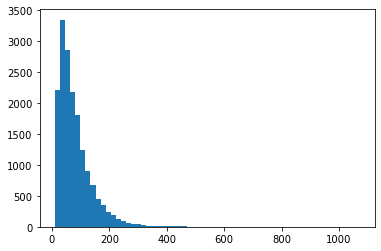

In [13]:
x = Genenal_Dataset['TestSet']['Real Room Duration']
plt.hist(x, bins = 60)
plt.show()

In [22]:
len(Genenal_Dataset['TrainSet']['Real Room Duration'])

135816

In [32]:
len(data_3)/len(Genenal_Dataset['TrainSet']['Real Room Duration'])

0.06157595570477705

In [24]:
x.mode()

0    30
dtype: int64

In [25]:
x.mean()

79.41556223125404

In [26]:
data_1=train_dataset[train_dataset['Real Room Duration']<=100]
data_1

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,Speciality,Part of the day,CUF_Unit,I1,Doctor,Month,Weekday,Anesthesia
97528,0,1,0,1,108,1,24,67.0,30,35.231121,73.699808,78.128355,29.376488,66.246753,79.575746,76.295369,36.332970
59337,0,0,0,3,249,2,76,46.0,90,84.799861,74.987601,78.128355,62.910761,102.050971,79.264845,76.295369,93.552812
6315,0,1,1,1,87,1,30,71.0,30,25.177548,74.987601,65.710019,35.396940,29.558140,76.679079,76.818586,36.332970
123219,0,0,0,2,69,1,70,17.0,60,83.377386,84.140671,82.238419,66.490842,86.351852,79.264845,80.683935,93.552812
107919,0,0,1,1,3,1,67,52.0,120,97.069451,74.987601,89.971818,56.185386,133.793246,80.278433,70.277298,93.552812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44556,0,0,1,3,143,4,87,45.0,120,97.069451,79.510016,78.128355,88.083183,82.670732,79.264845,82.362462,93.552812
49771,0,0,0,1,293,3,58,65.0,90,83.377386,84.140671,78.128355,86.930618,99.390977,77.612903,80.683935,93.552812
81180,0,0,1,4,132,2,96,68.0,120,84.799861,79.510016,82.238419,126.956750,83.459259,80.278433,81.861779,93.552812
31640,0,1,1,1,13,1,25,34.0,10,25.177548,84.140671,82.238419,34.984542,22.495256,79.575746,80.683935,36.332970


In [27]:
data_2=train_dataset[train_dataset['Real Room Duration']>100][train_dataset['Real Room Duration']<=180]
data_2

Boolean Series key will be reindexed to match DataFrame index.


,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,Speciality,Part of the day,CUF_Unit,I1,Doctor,Month,Weekday,Anesthesia
8659,0,0,1,1,84,4,108,59.0,90,83.377386,73.699808,78.128355,86.930618,99.867133,81.234219,82.362462,93.552812
155808,0,0,0,1,73,3,127,28.0,120,83.377386,74.987601,89.971818,135.329949,75.472222,78.211860,76.295369,93.552812
28982,0,0,0,1,179,1,109,62.0,90,97.069451,84.140671,89.971818,130.190476,102.473042,80.393772,82.362462,117.717256
160036,0,0,0,1,796,1,155,57.0,150,84.799861,84.140671,82.238419,53.995122,99.431746,79.575746,76.295369,93.552812
135811,0,0,1,1,3,1,120,42.0,90,84.799861,79.510016,76.503848,99.286957,130.458748,78.684266,82.362462,93.552812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12445,0,1,0,1,13,1,143,58.0,60,60.010331,79.510016,38.038363,70.706897,71.516667,79.227901,82.362462,36.332970
12446,0,0,1,1,31,2,159,45.0,150,82.567160,79.510016,79.016582,144.151584,82.220430,78.038784,76.818586,93.552812
19447,0,1,1,1,5,3,127,38.0,120,97.069451,79.510016,89.971818,85.442308,77.303748,79.575746,82.362462,72.719154
140111,0,0,0,2,114,1,109,65.0,90,84.799861,79.510016,78.128355,62.910761,184.479167,79.575746,80.683935,93.552812


In [28]:
Data_withsyntheticdata = pd.read_csv('Data_withsyntheticdata',header='infer')
Data_withsyntheticdata

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,Speciality,Part of the day,CUF_Unit,I1,Doctor,Month,Weekday,Anesthesia
0,0,0,1,1.0,41.0,6.0,77.000000,37.000000,120.0,97.069451,74.987601,78.128355,93.099476,82.670732,81.234219,82.362462,93.552812
1,0,0,0,1.0,21.0,2.0,416.034799,40.520910,NaN,262.252736,73.324830,78.130504,287.028080,332.458894,77.102209,78.431549,93.553642
2,0,1,0,1.0,50.0,1.0,89.000000,51.000000,120.0,84.256971,74.987601,78.128355,79.983092,88.803030,81.234219,70.277298,93.552812
3,0,0,1,1.0,50.0,2.0,250.407118,49.218030,NaN,82.567073,73.103264,66.071896,149.565249,95.199062,77.572655,80.738678,93.552795
4,0,0,0,2.0,582.0,1.0,201.150325,48.518027,NaN,120.894741,79.509385,82.237459,215.999914,99.760261,80.619020,81.418207,93.553054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271345,0,0,1,1.0,257.0,1.0,251.807383,65.707146,NaN,82.921078,84.140462,86.889791,128.670750,114.863414,79.803042,84.132825,93.551394
271346,0,1,0,1.0,358.0,1.0,46.000000,78.000000,30.0,35.231121,84.140671,79.016582,29.376488,36.176944,77.612903,76.818586,93.552812
271347,0,0,0,1.0,159.0,2.0,141.657147,58.706775,NaN,83.723270,84.139940,88.023187,130.374364,65.218425,78.364937,81.646207,93.551412
271348,0,0,1,1.0,65.0,1.0,385.615126,44.288318,NaN,87.366332,80.822577,89.971731,182.786803,140.116212,79.279763,81.342475,93.551177


In [29]:
data_3=train_dataset[train_dataset['Real Room Duration']>180]
data_3

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,Speciality,Part of the day,CUF_Unit,I1,Doctor,Month,Weekday,Anesthesia
107942,0,0,1,2,200,2,255,17.0,120,91.448206,79.510016,89.971818,190.829322,98.977654,80.278433,82.362462,93.552812
79251,0,0,1,1,116,2,233,71.0,210,129.593333,79.510016,82.238419,190.741573,175.274854,80.393772,82.362462,93.552812
62473,0,0,0,1,67,1,436,15.0,300,97.069451,74.987601,78.128355,412.658832,167.616667,78.684266,81.861779,93.552812
65656,0,0,1,1,240,1,195,64.0,120,97.069451,74.987601,89.971818,129.655305,103.083990,80.984848,76.295369,117.717256
145490,0,0,0,2,492,4,190,5.0,240,83.377386,74.987601,78.128355,35.396940,104.588732,80.278433,70.277298,93.552812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78705,0,0,1,1,53,1,181,67.0,120,35.231121,79.510016,82.238419,74.147541,43.833333,77.612903,81.861779,34.857291
135485,0,0,1,1,238,2,181,76.0,180,68.580158,79.510016,66.701613,114.988926,131.229167,77.612903,80.683935,93.552812
109751,0,0,1,2,328,1,273,19.0,150,68.580158,74.987601,89.971818,197.449806,85.913514,81.234219,76.818586,93.552812
77989,0,0,0,1,201,1,217,42.0,180,97.069451,109.376582,82.238419,124.476589,127.413374,80.984848,76.295369,90.603324


In [30]:
data_3.pop('CUF Planned Duration')

107942    120
79251     210
62473     300
65656     120
145490    240
         ... 
78705     120
135485    180
109751    150
77989     180
127816    240
Name: CUF Planned Duration, Length: 8363, dtype: Int64

In [55]:
data_2.pop('CUF Planned Duration')

8659       90
155808    120
28982      90
160036    150
135811     90
         ... 
12445      60
12446     150
19447     120
140111     90
27151     120
Name: CUF Planned Duration, Length: 26381, dtype: Int64

In [56]:
columns=data_3.columns

------

## Gaussian mixtures to General Case



### 1.1. Generate data to class 2 <a class="anchor" id="1.1"></a> 

In [218]:
#Gaussian mixtures


n_components = np.arange(1, 300,20)

model_sph_2 = [GMM(n, covariance_type='spherical', random_state=0).fit(data_2)
          for n in n_components]
aics_sph_2 = [m.aic(data_2) for m in model_sph_2]
bics_sph_2 = [m.bic(data_2) for m in model_sph_2]

In [219]:


model_dig_2 = [GMM(n, covariance_type='diag', random_state=0).fit(data_2)
          for n in n_components]
aics_dig_2 = [m.aic(data_2) for m in model_dig_2]
bics_dig_2 = [m.bic(data_2) for m in model_dig_2]


In [220]:
model_full_2 = [GMM(n, covariance_type='full', random_state=0).fit(data_2)
          for n in n_components]
aics_full_2 = [m.aic(data_2) for m in model_full_2]
bics_full_2 = [m.bic(data_2) for m in model_full_2]

In [221]:
model_tied_2 = [GMM(n, covariance_type='tied',max_iter=300, random_state=0).fit(data_2)
          for n in n_components]
aics_tied_2 = [m.aic(data_2) for m in model_tied_2]
bics_tied_2 = [m.bic(data_2) for m in model_tied_2]

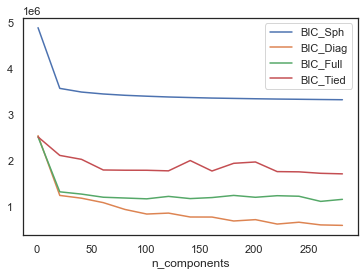

In [222]:
plt.plot(n_components, bics_sph_2, label='BIC_Sph')
plt.plot(n_components, bics_dig_2, label='BIC_Diag')
plt.plot(n_components, bics_full_2, label='BIC_Full')
plt.plot(n_components, bics_tied_2, label='BIC_Tied')
plt.legend(loc='upper right')
plt.xlabel('n_components');

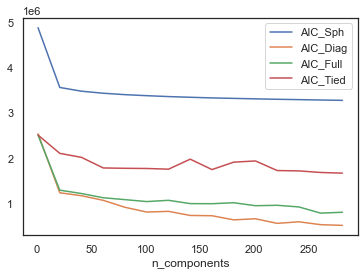

In [223]:
plt.plot(n_components, aics_sph_2, label='AIC_Sph')
plt.plot(n_components, aics_dig_2, label='AIC_Diag')
plt.plot(n_components,aics_full_2, label='AIC_Full')
plt.plot(n_components,aics_tied_2, label='AIC_Tied')
plt.legend(loc='upper right')
plt.xlabel('n_components');

* Best Model 

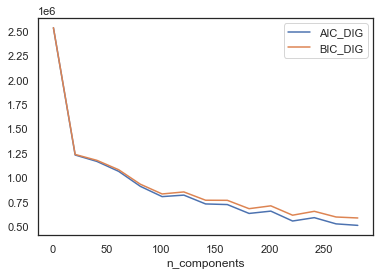

In [224]:
plt.plot(n_components,aics_dig_2, label='AIC_DIG')
plt.plot(n_components,bics_dig_2, label='BIC_DIG')
plt.legend(loc='upper right')
plt.xlabel('n_components');

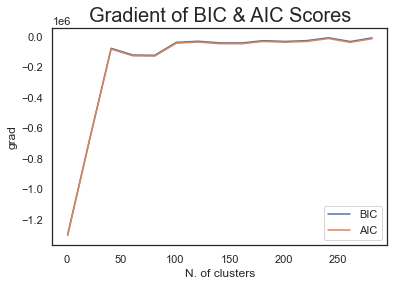

In [225]:
plt.errorbar(n_components, np.gradient(bics_dig_2), label='BIC')
plt.errorbar(n_components, np.gradient(aics_dig_2), label='AIC')
plt.title("Gradient of BIC & AIC Scores", fontsize=20)

plt.xlabel("N. of clusters")
plt.ylabel("grad")
plt.legend()

In [226]:
bestmodel_2=n_components[np.argmin(bics_dig_2)]
bestmodel_2

281

* Generate GMM

In [227]:
gmm_mnist_2 = GMM(n_components[np.argmin(bics_dig_2)], covariance_type='diag')
gmm_mnist_2.fit(data_2)

print(gmm_mnist_2.converged_)

True


In [228]:
gmm_labels_2 = gmm_mnist_2.fit_predict(data_2)
gmm_labels_2

array([165,  96,  69, ..., 124, 110, 121], dtype=int64)

In [229]:
df_concat_gmm_2 = pd.concat([data_2, pd.Series(gmm_labels_2, index=data_2.index, name="gmm_labels")], axis=1)
df_concat_gmm_2

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,Speciality,Part of the day,CUF_Unit,I1,Doctor,Month,Weekday,Anesthesia,gmm_labels
8659,0,0,1,1,84,4,108,59.0,83.377386,73.699808,78.128355,86.930618,99.867133,81.234219,82.362462,93.552812,165
155808,0,0,0,1,73,3,127,28.0,83.377386,74.987601,89.971818,135.329949,75.472222,78.211860,76.295369,93.552812,96
28982,0,0,0,1,179,1,109,62.0,97.069451,84.140671,89.971818,130.190476,102.473042,80.393772,82.362462,117.717256,69
160036,0,0,0,1,796,1,155,57.0,84.799861,84.140671,82.238419,53.995122,99.431746,79.575746,76.295369,93.552812,271
135811,0,0,1,1,3,1,120,42.0,84.799861,79.510016,76.503848,99.286957,130.458748,78.684266,82.362462,93.552812,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12445,0,1,0,1,13,1,143,58.0,60.010331,79.510016,38.038363,70.706897,71.516667,79.227901,82.362462,36.332970,91
12446,0,0,1,1,31,2,159,45.0,82.567160,79.510016,79.016582,144.151584,82.220430,78.038784,76.818586,93.552812,72
19447,0,1,1,1,5,3,127,38.0,97.069451,79.510016,89.971818,85.442308,77.303748,79.575746,82.362462,72.719154,124
140111,0,0,0,2,114,1,109,65.0,84.799861,79.510016,78.128355,62.910761,184.479167,79.575746,80.683935,93.552812,110


* Generate Points

In [230]:
n_synthetic_points_2=len(data_1)-len(data_2)
print('Number of points generated:',n_synthetic_points_2)

Number of points generated: 74691


In [231]:
# Now we have the model of the data we can generate synthetic datasets!
data_new_2,y_2 = gmm_mnist_2.sample(n_synthetic_points_2)
data_new_2.shape

(74691, 16)

In [232]:
df_data_new_2=pd.DataFrame(data_new_2,columns=columns)
df_data_new_2

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,Speciality,Part of the day,CUF_Unit,I1,Doctor,Month,Weekday,Anesthesia
0,-0.000025,-0.000595,9.995947e-01,1.998939,242.000242,1.000320,113.001049,22.000720,97.066932,84.141707,82.238966,79.198885,127.413677,80.277729,70.276563,90.603060
1,-0.000447,0.000156,1.000248e+00,1.999429,241.999930,0.998749,113.000718,21.998976,97.069498,84.141047,82.238364,79.197342,127.412556,80.278047,70.278172,90.602163
2,0.000212,-0.001247,9.993181e-01,1.999577,241.998888,0.999367,113.001233,21.999751,97.069586,84.140639,82.237776,79.197926,127.413545,80.278875,70.276675,90.602966
3,-0.000631,-0.000425,1.000764e+00,2.000586,242.000753,1.000831,112.999511,21.999535,97.069095,84.139862,82.238959,79.197949,127.413071,80.276422,70.277626,90.603130
4,0.000176,0.000256,9.993124e-01,1.019078,325.573448,0.919819,121.491270,51.680171,82.567958,84.821376,89.972104,120.307548,83.622930,79.145691,78.865866,117.717954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74686,0.000400,0.000143,-6.159842e-04,2.000174,163.999101,0.999300,134.999692,15.999377,58.102234,79.511138,89.971670,106.941746,60.252056,80.278705,80.684920,90.602121
74687,0.000011,-0.000530,1.185476e-03,2.000180,163.999522,1.002147,134.999891,15.999883,58.104528,79.509744,89.971610,106.940405,60.254501,80.278451,80.685608,90.602453
74688,-0.000757,-0.001104,1.523191e-03,1.998702,164.000287,1.000824,134.997319,16.000015,58.103565,79.511127,89.972451,106.941856,60.252697,80.278366,80.684895,90.603794
74689,-0.000270,0.000038,1.717239e-03,1.998572,164.000138,0.998432,134.999333,16.000125,58.103077,79.508399,89.973124,106.941644,60.252766,80.276346,80.681376,90.602906


In [233]:
data_new_concat_gmm_2 = pd.concat([df_data_new_2, pd.Series(y_2, index=df_data_new_2.index, name="gmm_labels")], axis=1)

<AxesSubplot:xlabel='Age', ylabel='Real Room Duration'>

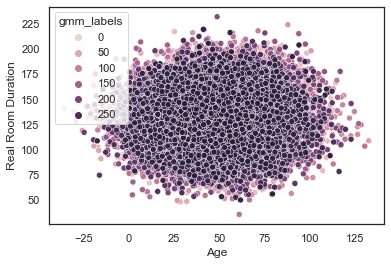

In [234]:
sns.scatterplot(x=df_data_new_2['Age'], y=df_data_new_2['Real Room Duration'],hue="gmm_labels",data=data_new_concat_gmm_2)

<AxesSubplot:xlabel='Age', ylabel='Real Room Duration'>

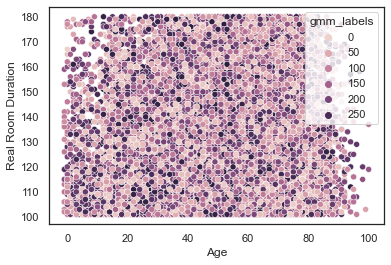

In [235]:
sns.scatterplot(x=data_2['Age'], y=data_2['Real Room Duration'],hue="gmm_labels",data=df_concat_gmm_2)

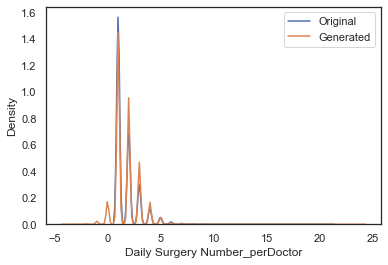

In [248]:
ax=sns.kdeplot(data_2['Daily Surgery Number_perDoctor'].astype(int).reset_index(drop=True), label="Original")
sns.kdeplot(df_data_new_2['Daily Surgery Number_perDoctor'].reset_index(drop=True), label="Generated")
ax.legend()
plt.show()

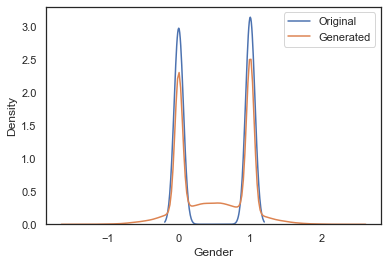

In [237]:
ax=sns.kdeplot(data_2['Gender'].reset_index(drop=True), label="Original")
sns.kdeplot(df_data_new_2['Gender'].reset_index(drop=True), label="Generated")
ax.legend()
plt.show()

In [104]:
def round0_1(x):
    
    value_1=abs(1-x)
    value_2=abs(x)
    
    if value_1>value_2:
        return 0
    
    else:
        return 1

In [239]:
df_data_new_2['Gender']=df_data_new_2['Gender'].apply(round0_1)    

In [240]:
df_data_new_2['Procedures_I']=df_data_new_2['Procedures_I'].round() 
df_data_new_2['Daily Surgery Number_perDoctor']=df_data_new_2['Daily Surgery Number_perDoctor'].round() 
df_data_new_2['Surgery Number Performed_perDoctor']=df_data_new_2['Surgery Number Performed_perDoctor'].round() 
df_data_new_2['Hospitalization']=df_data_new_2['Hospitalization'].apply(round0_1)  
df_data_new_2['Urgency']=df_data_new_2['Urgency'].apply(round0_1)

----

### 1.2. Generate data to class 3 <a class="anchor" id="1.2"></a> 

In [241]:
#Gaussian mixtures
from sklearn.mixture import GaussianMixture as GMM

n_components = np.arange(1, 500,20)

model_sph = [GMM(n, covariance_type='spherical', random_state=0).fit(data_3)
          for n in n_components]
aics_sph = [m.aic(data_3) for m in model_sph]
bics_sph = [m.bic(data_3) for m in model_sph]



In [242]:


model_dig = [GMM(n, covariance_type='diag', random_state=0).fit(data_3)
          for n in n_components]
aics_dig = [m.aic(data_3) for m in model_dig]
bics_dig = [m.bic(data_3) for m in model_dig]


In [243]:
model_full = [GMM(n, covariance_type='full', random_state=0).fit(data_3)
          for n in n_components]
aics_full = [m.aic(data_3) for m in model_full]
bics_full = [m.bic(data_3) for m in model_full]

In [244]:
model_tied = [GMM(n, covariance_type='tied', random_state=0).fit(data_3)
          for n in n_components]
aics_tied = [m.aic(data_3) for m in model_tied]
bics_tied = [m.bic(data_3) for m in model_tied]


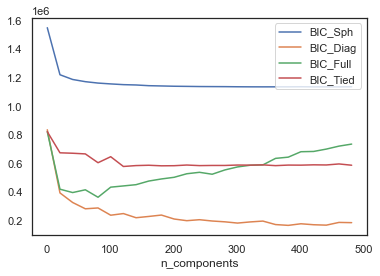

In [245]:
plt.plot(n_components, bics_sph, label='BIC_Sph')
plt.plot(n_components, bics_dig, label='BIC_Diag')
plt.plot(n_components, bics_full, label='BIC_Full')
plt.plot(n_components, bics_tied, label='BIC_Tied')
plt.legend(loc='upper right')
plt.xlabel('n_components');

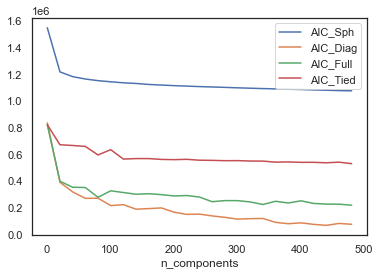

In [246]:
plt.plot(n_components, aics_sph, label='AIC_Sph')
plt.plot(n_components, aics_dig, label='AIC_Diag')
plt.plot(n_components,aics_full, label='AIC_Full')
plt.plot(n_components,aics_tied, label='AIC_Tied')
plt.legend(loc='upper right')
plt.xlabel('n_components');

* Best model - Diagonal

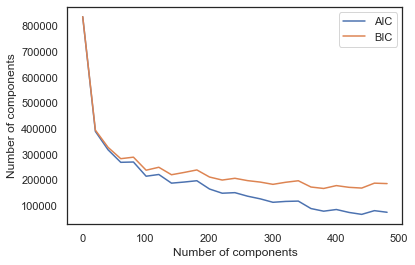

In [250]:
plt.plot(n_components,aics_dig, label='AIC')
plt.plot(n_components,bics_dig, label='BIC')
plt.legend(loc='upper right')
plt.xlabel('Number of components');
plt.ylabel('Number of components');

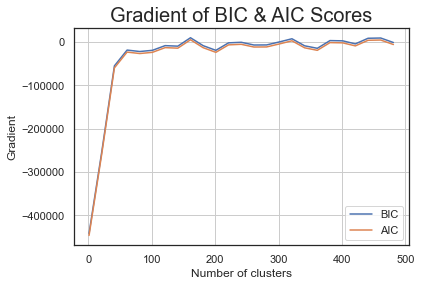

In [251]:
plt.errorbar(n_components, np.gradient(bics_dig), label='BIC')
plt.errorbar(n_components, np.gradient(aics_dig), label='AIC')
plt.title("Gradient of BIC & AIC Scores", fontsize=20)
plt.xlabel("Number of clusters")
plt.ylabel("Gradient")
plt.grid()
plt.legend()

In [252]:
bestmodel=n_components[np.argmin(bics_dig)]
bestmodel

381

* Generate GMM

In [253]:
gmm_mnist = GMM(n_components[np.argmin(bics_dig)], covariance_type='diag')
gmm_mnist.fit(data_3)

print(gmm_mnist.converged_)

True


In [254]:
gmm_labels = gmm_mnist.fit_predict(data_3)
gmm_labels

array([292,  23, 231, ..., 283, 357, 213], dtype=int64)

In [255]:
df_concat_gmm = pd.concat([data_3, pd.Series(gmm_labels, index=data_3.index, name="gmm_labels")], axis=1)
df_concat_gmm

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,Speciality,Part of the day,CUF_Unit,I1,Doctor,Month,Weekday,Anesthesia,gmm_labels
107942,0,0,1,2,200,2,255,17.0,91.448206,79.510016,89.971818,190.829322,98.977654,80.278433,82.362462,93.552812,292
79251,0,0,1,1,116,2,233,71.0,129.593333,79.510016,82.238419,190.741573,175.274854,80.393772,82.362462,93.552812,23
62473,0,0,0,1,67,1,436,15.0,97.069451,74.987601,78.128355,412.658832,167.616667,78.684266,81.861779,93.552812,231
65656,0,0,1,1,240,1,195,64.0,97.069451,74.987601,89.971818,129.655305,103.083990,80.984848,76.295369,117.717256,202
145490,0,0,0,2,492,4,190,5.0,83.377386,74.987601,78.128355,35.396940,104.588732,80.278433,70.277298,93.552812,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78705,0,0,1,1,53,1,181,67.0,35.231121,79.510016,82.238419,74.147541,43.833333,77.612903,81.861779,34.857291,200
135485,0,0,1,1,238,2,181,76.0,68.580158,79.510016,66.701613,114.988926,131.229167,77.612903,80.683935,93.552812,93
109751,0,0,1,2,328,1,273,19.0,68.580158,74.987601,89.971818,197.449806,85.913514,81.234219,76.818586,93.552812,283
77989,0,0,0,1,201,1,217,42.0,97.069451,109.376582,82.238419,124.476589,127.413374,80.984848,76.295369,90.603324,357


* Generate Points

In [256]:
n_synthetic_points=len(data_1)-len(data_3)

In [257]:
# Now we have the model of the data we can generate synthetic datasets!
data_new,y = gmm_mnist.sample(n_synthetic_points)
data_new.shape

(92709, 16)

In [258]:
df_data_new=pd.DataFrame(data_new,columns=columns)
df_data_new

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,Speciality,Part of the day,CUF_Unit,I1,Doctor,Month,Weekday,Anesthesia
0,0.000094,-0.000550,-0.000875,1.729252,530.348957,2.405885,191.074062,66.738740,99.122008,74.975797,81.221458,90.249214,74.777583,82.802867,79.141858,79.263565
1,-0.000794,0.001145,0.000815,2.182678,524.492977,0.232231,190.545244,70.974440,57.111367,82.388651,80.469888,95.616503,92.322649,83.120618,76.775319,74.647301
2,-0.001584,0.001026,0.000295,0.812207,518.940890,1.862550,192.190945,68.554354,83.077451,82.785645,74.029404,115.128288,92.412288,81.061881,80.303043,77.175794
3,-0.002136,-0.000783,0.000004,0.726576,476.140644,1.854790,194.322946,73.527755,100.870151,88.248752,80.209269,119.239567,122.251943,82.530713,77.254748,76.548360
4,0.000775,0.000137,0.001284,1.278601,510.253631,1.893461,201.367010,64.577102,92.525710,74.528312,86.754361,119.645662,167.499924,83.285987,77.889001,72.956668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92704,0.000556,-0.000864,0.185069,1.000673,892.465562,0.999840,249.234064,52.413492,84.799036,82.515936,87.208147,306.297872,149.707549,80.279302,82.059365,93.553114
92705,0.000913,0.001816,0.469836,0.999844,902.209524,0.998068,270.814070,39.586040,84.799262,81.025133,85.158417,306.297878,149.709929,80.278120,81.575309,93.554946
92706,-0.000080,-0.002137,1.154591,1.000674,889.795747,0.999215,285.679618,56.405200,84.799427,78.630508,91.777119,306.298324,149.710796,80.280500,81.864733,93.553026
92707,-0.000723,-0.001527,1.101331,0.999901,923.769725,0.999746,250.983741,58.292369,84.797092,81.666473,82.663946,306.299348,149.709430,80.277204,82.087947,93.552219


In [259]:
data_new_concat_gmm = pd.concat([df_data_new, pd.Series(y, index=df_data_new.index, name="gmm_labels")], axis=1)


* #### Observe distributions

<AxesSubplot:xlabel='Age', ylabel='Real Room Duration'>

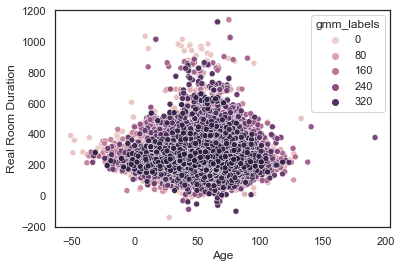

In [260]:
sns.scatterplot(x=df_data_new['Age'], y=df_data_new['Real Room Duration'],hue="gmm_labels",data=data_new_concat_gmm)

<AxesSubplot:xlabel='Age', ylabel='Real Room Duration'>

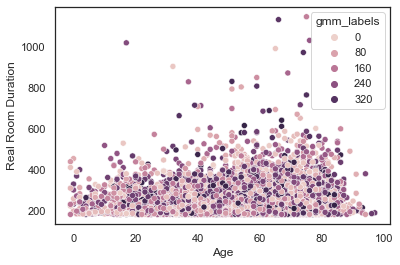

In [261]:
sns.scatterplot(x=data_3['Age'], y=data_3['Real Room Duration'],hue="gmm_labels",data=df_concat_gmm)

* Weekdays

In [262]:
from sklearn.cluster import KMeans
kmeans_weekday = KMeans(7)
labels_weekday = kmeans_weekday.fit_predict(df_data_new[['Weekday']])
df_weekdays=pd.Series(labels_weekday)
df_weekdays.value_counts(normalize=True)

5    0.240635
0    0.234648
6    0.190035
2    0.177847
1    0.077824
4    0.052055
3    0.026955
dtype: float64

In [263]:
data_3['Weekday'].value_counts(normalize=True)

81.861779    0.220375
80.683935    0.215234
82.362462    0.176611
76.818586    0.174459
76.295369    0.164176
70.277298    0.046036
70.756144    0.003109
Name: Weekday, dtype: float64

* Age

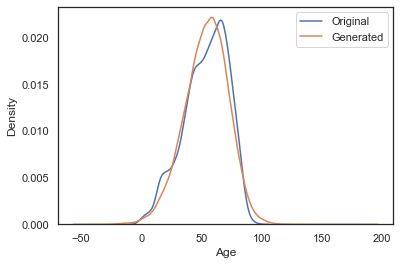

In [264]:
ax=sns.kdeplot(data_3['Age'].reset_index(drop=True), label="Original")
sns.kdeplot(df_data_new['Age'].reset_index(drop=True), label="Generated")
ax.legend()
plt.show()

* Specialities

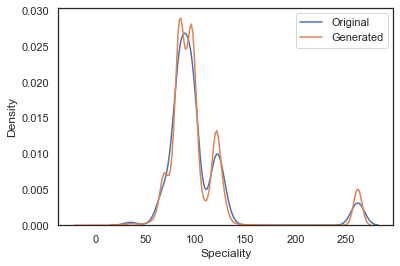

In [265]:
ax=sns.kdeplot(data_3['Speciality'].reset_index(drop=True), label="Original")
sns.kdeplot(df_data_new['Speciality'].reset_index(drop=True), label="Generated")
ax.legend()
plt.show()

* Gender

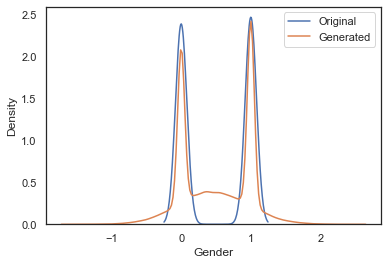

In [266]:
ax=sns.kdeplot(data_3['Gender'].reset_index(drop=True), label="Original")
sns.kdeplot(df_data_new['Gender'].reset_index(drop=True), label="Generated")
ax.legend()
plt.show()

In [267]:
from sklearn.cluster import KMeans
kmeans_gender = KMeans(2)
labels_gender = kmeans_gender.fit_predict(df_data_new[['Gender']])
df_gender=pd.Series(labels_gender)
df_gender.value_counts(normalize=True)

1    0.508635
0    0.491365
dtype: float64

In [268]:
data_3['Gender'].value_counts(normalize=True)

1    0.508191
0    0.491809
Name: Gender, dtype: float64

* Transformations

In [269]:
df_data_new['Gender']=df_data_new['Gender'].apply(round0_1) 
df_data_new['Procedures_I']=df_data_new['Procedures_I'].round() 
df_data_new['Daily Surgery Number_perDoctor']=df_data_new['Daily Surgery Number_perDoctor'].round() 
df_data_new['Surgery Number Performed_perDoctor']=df_data_new['Surgery Number Performed_perDoctor'].round() 
df_data_new['Hospitalization']=df_data_new['Hospitalization'].apply(round0_1)  
df_data_new['Urgency']=df_data_new['Urgency'].apply(round0_1)

-----


### 1.3. Save synthetic data <a class="anchor" id="1.3"></a> 

In [270]:
df_data_new_2.to_csv('Data2_synthetic',index=False)

In [271]:
df_data_new.to_csv('Data3_synthetic',index=False)

---

### 1.4. Concatenate and randomize data <a class="anchor" id="1.4"></a> 

In [272]:
# concatenating df1 and df2 along rows
Data_withsyntheticdata = pd.concat([data_1, data_2,data_3,df_data_new_2,df_data_new], axis=0)


In [273]:
Data_withsyntheticdata.shape

(303216, 17)

In [274]:
Data_withsyntheticdata = Data_withsyntheticdata.sample(frac=1)

In [278]:
Data_withsyntheticdata=Data_withsyntheticdata[Data_withsyntheticdata['Real Room Duration']>5]
Data_withsyntheticdata=Data_withsyntheticdata[Data_withsyntheticdata['Age']>0]
Data_withsyntheticdata=Data_withsyntheticdata[Data_withsyntheticdata['Procedures_I']>0]
Data_withsyntheticdata=Data_withsyntheticdata[Data_withsyntheticdata['Daily Surgery Number_perDoctor']>0]
Data_withsyntheticdata=Data_withsyntheticdata[Data_withsyntheticdata['Surgery Number Performed_perDoctor']>0]
Data_withsyntheticdata=Data_withsyntheticdata[Data_withsyntheticdata['Doctor']>0]
Data_withsyntheticdata=Data_withsyntheticdata[Data_withsyntheticdata['I1']>0]

In [279]:
Data_withsyntheticdata.to_csv('Data_withsyntheticdata',index=False)

In [280]:
test_dataset.to_csv('Data_test',index=False)

In [41]:
df_train_general = pd.read_csv('Data_test',header='infer')
df_train_general

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,Speciality,Part of the day,CUF_Unit,I1,Doctor,Month,Weekday,Anesthesia
0,0,0,0,4,78,1,41,65.0,60,84.799861,74.987601,68.701950,62.910761,64.647143,79.264845,82.362462,79.007678
1,0,0,0,1,28,3,55,71.0,60,68.580158,79.510016,68.701950,29.501126,49.730159,81.234219,80.683935,93.552812
2,0,1,0,1,34,1,12,71.0,60,68.580158,79.510016,68.701950,29.501126,49.730159,79.227901,80.683935,93.552812
3,0,0,1,2,123,1,53,66.0,60,97.069451,73.699808,68.701950,128.531250,75.286885,78.038784,82.362462,93.552812
4,0,0,1,4,65,1,55,36.0,30,97.069451,79.510016,68.701950,82.114754,84.685590,77.612903,81.861779,79.007678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16972,0,1,0,3,572,1,19,50.0,20,25.177548,74.987601,82.238419,34.984542,17.152401,76.679079,80.683935,36.332970
16973,0,1,0,1,87,1,90,71.0,90,35.231121,84.140671,82.238419,89.062497,51.345679,78.038784,76.818586,93.552812
16974,0,1,0,2,1040,1,94,54.0,60,84.799861,84.140671,82.238419,34.984542,83.589057,81.234219,76.818586,36.332970
16975,0,1,0,4,1064,2,33,47.0,60,84.799861,74.987601,82.238419,34.984542,83.589057,80.393772,76.818586,36.332970


---


## 2. Surgeon Case <a class="anchor" id="2"></a> 

### Separte into 3 classes: two of them minority

In [33]:
list_surgeons

['132273102', '093935231', '775653212', '462002202', '175018342', ..., '670774102', '366884942', '537046661', '524975801', '806701901']
Length: 381
Categories (381, object): ['132273102', '093935231', '775653212', '462002202', ..., '366884942', '537046661', '524975801', '806701901']

In [58]:
position = np.where(list_surgeons == '96440008')[0][0]
position

299

In [59]:
train_dataset_surgeon=Surgeons_Dataset[list_surgeons[position]]['TrainSet']
test_dataset_surgeon=Surgeons_Dataset[list_surgeons[position]]['TestSet']

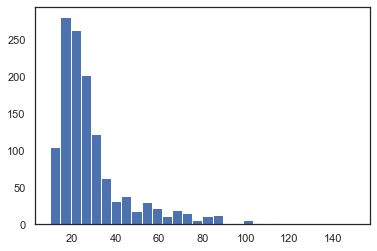

In [60]:
x = train_dataset_surgeon['Real Room Duration']
plt.hist(x, bins = 30)
plt.show()

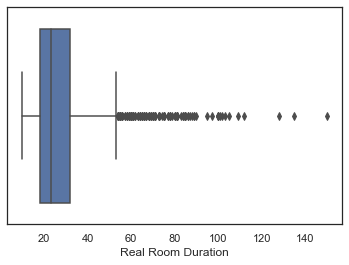

In [61]:
import seaborn as sns
sns.set_theme(style="white")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=train_dataset_surgeon['Real Room Duration'])

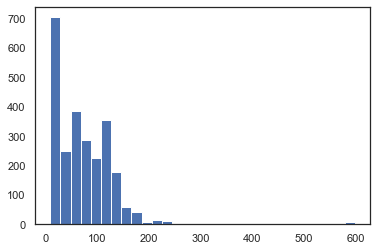

In [62]:
df_train = pd.read_csv('Data_withsyntheticdata_surgeon',header='infer')


x = df_train['Real Room Duration']
plt.hist(x, bins = 30)
plt.show()

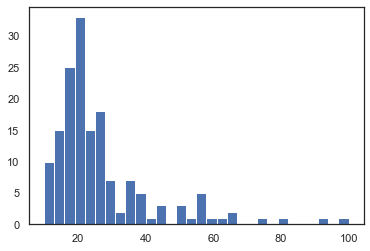

In [63]:
x = test_dataset_surgeon['Real Room Duration']
plt.hist(x, bins = 30)
plt.show()

In [75]:
train_dataset[train_dataset['Real Room Duration']>=31].shape[0]/train_dataset['Real Room Duration'].shape[0]

0.26798418972332017

In [76]:
test_dataset[test_dataset['Real Room Duration']>=31].shape[0]/test_dataset['Real Room Duration'].shape[0]

0.22151898734177214

In [77]:
x.mode()

0    20
dtype: int64

In [78]:
x.mean()

26.335443037974684

In [83]:
data_1_surgeon=train_dataset_surgeon[train_dataset_surgeon['Real Room Duration']<=28]
data_1_surgeon

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,I1,Part of the day,Speciality,CUF_Unit,Month,Weekday,Anesthesia
385,0,1,1,2,117,1,15,70.0,20,22.274376,28.212867,28.922468,28.931225,25.790476,29.081590,22.730851
676,0,1,1,3,706,2,18,84.0,20,22.274376,28.212867,28.922468,28.931225,28.581395,29.081590,22.730851
1224,0,1,0,3,1238,1,25,58.0,30,22.274376,28.212867,28.922468,28.931225,26.371429,28.663239,22.730851
1101,0,1,0,1,860,1,15,87.0,20,22.274376,28.212867,28.922468,28.931225,29.500000,28.663239,22.730851
31,0,1,0,4,58,1,15,77.0,20,22.274376,28.212867,28.922468,28.931225,28.039216,29.081590,22.730851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0,1,1,1,479,1,28,61.0,20,22.274376,28.212867,28.922468,28.931225,29.500000,28.526646,22.730851
14,0,1,1,1,89,1,18,75.0,20,22.274376,28.212867,28.922468,28.931225,25.790476,29.081590,22.730851
618,0,1,1,2,587,1,15,77.0,30,22.274376,28.212867,28.922468,28.931225,28.601695,28.663239,22.730851
1397,0,1,1,2,1524,1,20,69.0,30,22.274376,27.390625,28.922468,28.931225,27.347826,29.081590,22.730851


In [84]:
data_2_surgeon=train_dataset_surgeon[train_dataset_surgeon['Real Room Duration']>28][train_dataset_surgeon['Real Room Duration']<=40]
data_2_surgeon

Boolean Series key will be reindexed to match DataFrame index.


,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,I1,Part of the day,Speciality,CUF_Unit,Month,Weekday,Anesthesia
50,0,1,0,2,135,1,33,66.0,20,22.274376,28.212867,28.922468,28.931225,30.870968,28.663239,22.730851
1297,0,1,0,3,1297,1,30,71.0,20,22.274376,28.212867,28.922468,28.931225,29.500000,28.526646,22.730851
1338,0,1,1,5,1407,1,40,66.0,60,53.745098,42.573529,28.922468,28.931225,32.651163,29.081590,49.927586
893,0,1,1,2,1231,1,32,79.0,30,22.274376,28.212867,28.922468,28.931225,26.371429,29.081590,22.730851
1056,0,0,1,4,1010,1,34,72.0,30,22.274376,28.212867,28.922468,28.931225,28.601695,29.081590,49.927586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,0,1,0,4,1259,1,35,82.0,30,22.274376,28.212867,28.922468,28.931225,26.371429,29.081590,22.730851
526,0,1,1,4,841,1,30,49.0,20,22.274376,28.212867,28.922468,28.931225,28.136842,28.526646,22.730851
943,0,1,0,1,909,1,30,72.0,30,22.274376,28.212867,28.922468,28.931225,28.039216,29.081590,22.730851
1061,0,1,1,1,1253,1,40,71.0,20,53.745098,28.212867,28.922468,28.931225,26.371429,28.526646,22.730851


In [85]:
data_3_surgeon=train_dataset_surgeon[train_dataset_surgeon['Real Room Duration']>40]
data_3_surgeon

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,I1,Part of the day,Speciality,CUF_Unit,Month,Weekday,Anesthesia
793,0,0,1,2,632,1,46,61.0,20,53.745098,28.212867,28.922468,28.931225,32.651163,29.081590,49.927586
278,0,0,1,5,51,1,67,61.0,20,53.745098,28.212867,28.922468,28.931225,28.039216,28.663239,49.927586
1314,0,1,1,1,1300,1,63,101.0,20,22.274376,28.212867,28.922468,28.931225,29.500000,29.081590,49.927586
196,0,0,0,3,125,1,54,67.0,20,36.657619,28.212867,28.922468,28.931225,30.870968,29.081590,49.927586
218,0,0,1,3,382,1,73,43.0,20,53.745098,28.212867,28.922468,28.931225,27.347826,28.663239,49.927586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0,1,1,4,686,1,54,64.0,30,53.745098,28.212867,28.922468,28.931225,28.581395,28.663239,49.927586
1313,0,1,0,1,1402,1,46,59.0,60,53.745098,27.390625,28.922468,28.931225,32.651163,28.663239,49.927586
1152,0,1,0,1,1216,1,60,70.0,60,53.745098,28.212867,28.922468,28.931225,27.347826,28.526646,49.927586
1533,0,1,1,5,1444,1,47,82.0,60,53.745098,42.573529,28.922468,28.931225,31.794393,29.081590,49.927586


In [86]:
data_3_surgeon.pop('CUF Planned Duration')
data_2_surgeon.pop('CUF Planned Duration')
columns_surgeons=data_2_surgeon.columns
columns_surgeons

Index(['Urgency', 'Hospitalization', 'Gender',
       'Daily Surgery Number_perDoctor', 'Surgery Number Performed_perDoctor',
       'Procedures_I', 'Real Room Duration', 'Age', 'I1', 'Part of the day',
       'Speciality', 'CUF_Unit', 'Month', 'Weekday', 'Anesthesia'],
      dtype='object')

### Gaussian mixtures

### 2.1. Generate data to class 2 <a class="anchor" id="2.1"></a> 

In [88]:

n_components_surgeon = np.arange(1, 100,2)


In [72]:
#Gaussian mixtures


n_components_surgeon = np.arange(1, 100,2)

model_sph_2_surgeon = [GMM(n, covariance_type='spherical', random_state=0).fit(data_2_surgeon)
          for n in n_components_surgeon]
aics_sph_2_surgeon = [m.aic(data_2_surgeon) for m in model_sph_2_surgeon]
bics_sph_2_surgeon = [m.bic(data_2_surgeon) for m in model_sph_2_surgeon]

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


In [89]:
model_dig_2_surgeon = [GMM(n, covariance_type='diag', random_state=0).fit(data_2_surgeon)
          for n in n_components_surgeon]
aics_dig_2_surgeon = [m.aic(data_2_surgeon) for m in model_dig_2_surgeon]
bics_dig_2_surgeon = [m.bic(data_2_surgeon) for m in model_dig_2_surgeon]


KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


In [74]:
model_full_2_surgeon = [GMM(n, covariance_type='full', random_state=0).fit(data_2_surgeon)
          for n in n_components_surgeon]
aics_full_2_surgeon = [m.aic(data_2_surgeon) for m in model_full_2_surgeon]
bics_full_2_surgeon = [m.bic(data_2_surgeon) for m in model_full_2_surgeon]

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


In [75]:
model_tied_2_surgeon = [GMM(n, covariance_type='tied', random_state=0).fit(data_2_surgeon)
          for n in n_components_surgeon]
aics_tied_2_surgeon = [m.aic(data_2_surgeon) for m in model_tied_2_surgeon]
bics_tied_2_surgeon = [m.bic(data_2_surgeon) for m in model_tied_2_surgeon]

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.


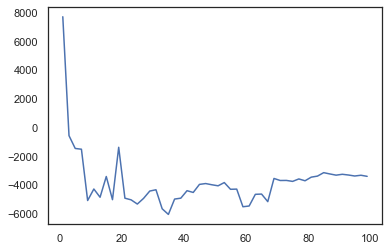

In [90]:
plt.plot(n_components_surgeon, bics_dig_2_surgeon, label='BIC_Diag')

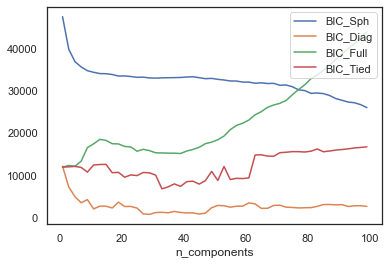

In [76]:
plt.plot(n_components_surgeon, bics_sph_2_surgeon, label='BIC_Sph')
plt.plot(n_components_surgeon, bics_dig_2_surgeon, label='BIC_Diag')
plt.plot(n_components_surgeon, bics_full_2_surgeon, label='BIC_Full')
plt.plot(n_components_surgeon, bics_tied_2_surgeon, label='BIC_Tied')
plt.legend(loc='upper right')
plt.xlabel('n_components');

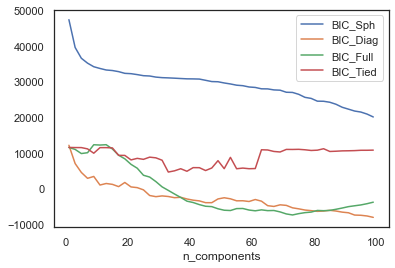

In [77]:
plt.plot(n_components_surgeon, aics_sph_2_surgeon, label='BIC_Sph')
plt.plot(n_components_surgeon, aics_dig_2_surgeon, label='BIC_Diag')
plt.plot(n_components_surgeon, aics_full_2_surgeon, label='BIC_Full')
plt.plot(n_components_surgeon, aics_tied_2_surgeon, label='BIC_Tied')
plt.legend(loc='upper right')
plt.xlabel('n_components');

* Best Model

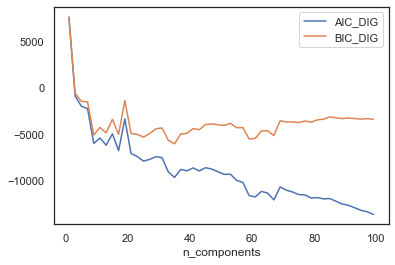

In [91]:
plt.plot(n_components_surgeon,aics_dig_2_surgeon, label='AIC_DIG')
plt.plot(n_components_surgeon,bics_dig_2_surgeon, label='BIC_DIG')
plt.legend(loc='upper right')
plt.xlabel('n_components');

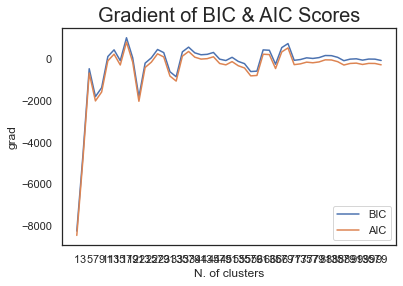

In [92]:
plt.errorbar(n_components_surgeon, np.gradient(bics_dig_2_surgeon), label='BIC')
plt.errorbar(n_components_surgeon, np.gradient(aics_dig_2_surgeon), label='AIC')
plt.title("Gradient of BIC & AIC Scores", fontsize=20)
plt.xticks(n_components_surgeon)
plt.xlabel("N. of clusters")
plt.ylabel("grad")
plt.legend()

In [93]:
bestmodel_2_surgeon=n_components_surgeon[np.argmin(bics_dig_2_surgeon)]
bestmodel_2_surgeon

35

In [94]:
gmm_mnist_2_surgeon = GMM(n_components_surgeon[np.argmin(bics_dig_2_surgeon)], covariance_type='diag')
gmm_mnist_2_surgeon.fit(data_2_surgeon)

print(gmm_mnist_2_surgeon.converged_)

True


In [95]:
gmm_labels_2_surgeon = gmm_mnist_2_surgeon.fit_predict(data_2_surgeon)
gmm_labels_2_surgeon

array([12, 30, 22,  4, 17, 16,  9,  0,  4,  4, 12, 30, 23,  5,  4, 16, 30,
       23,  4, 22, 24,  4, 21, 30,  4,  4, 32, 15, 14, 21, 11,  2, 16,  4,
       14,  2, 16,  4, 20, 30,  4, 19,  2, 11,  5, 34, 30, 13, 24, 19,  4,
       30, 30, 13, 27, 30, 23,  4,  4, 25,  4, 19,  4,  4, 30,  4,  4, 24,
       32, 21,  5, 32, 19,  1,  5,  4, 30,  4, 31,  4,  4, 26,  5, 10,  9,
        1,  5,  4, 16,  4, 21,  4,  6, 29, 12, 11, 11,  1,  4, 16, 30, 20,
        5,  2,  3, 21, 12, 21,  1,  4,  4, 18, 26,  6,  5,  4,  8, 30, 16,
        4, 16,  4, 27,  4,  5,  4, 24, 16,  7, 31, 24,  4, 22, 19,  4, 18,
        3,  4, 12, 24,  3,  4, 20, 21,  4, 33,  4,  4,  4,  4, 24, 16,  4,
       21,  5, 30, 30, 28, 14, 30,  4, 29,  4, 16,  9, 22,  0,  4,  9, 24,
       19, 32, 23,  4,  4,  4, 26, 16, 16, 15, 30,  8, 30,  4, 33,  5, 31,
        7, 29, 24, 10, 18,  4, 24,  4,  3, 22,  9, 29, 13, 30, 19, 30, 17,
       33, 24,  4, 30, 13, 25], dtype=int64)

In [96]:
df_concat_gmm_2_surgeons= pd.concat([data_2_surgeon, pd.Series(gmm_labels_2_surgeon, index=data_2_surgeon.index, name="gmm_labels")], axis=1)
df_concat_gmm_2_surgeons

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,I1,Part of the day,Speciality,CUF_Unit,Month,Weekday,Anesthesia,gmm_labels
50,0,1,0,2,135,1,33,66.0,22.274376,28.212867,28.922468,28.931225,30.870968,28.663239,22.730851,12
1297,0,1,0,3,1297,1,30,71.0,22.274376,28.212867,28.922468,28.931225,29.500000,28.526646,22.730851,30
1338,0,1,1,5,1407,1,40,66.0,53.745098,42.573529,28.922468,28.931225,32.651163,29.081590,49.927586,22
893,0,1,1,2,1231,1,32,79.0,22.274376,28.212867,28.922468,28.931225,26.371429,29.081590,22.730851,4
1056,0,0,1,4,1010,1,34,72.0,22.274376,28.212867,28.922468,28.931225,28.601695,29.081590,49.927586,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,0,1,0,4,1259,1,35,82.0,22.274376,28.212867,28.922468,28.931225,26.371429,29.081590,22.730851,24
526,0,1,1,4,841,1,30,49.0,22.274376,28.212867,28.922468,28.931225,28.136842,28.526646,22.730851,4
943,0,1,0,1,909,1,30,72.0,22.274376,28.212867,28.922468,28.931225,28.039216,29.081590,22.730851,30
1061,0,1,1,1,1253,1,40,71.0,53.745098,28.212867,28.922468,28.931225,26.371429,28.526646,22.730851,13


* Generate points

In [97]:
n_synthetic_points_2_surgeons=len(data_1_surgeon)-len(data_2_surgeon)
print('Number of points generated:',n_synthetic_points_2_surgeons)

Number of points generated: 641


In [98]:
# Now we have the model of the data we can generate synthetic datasets!
data_new_2_surgeons,y_2_surgeons = gmm_mnist_2_surgeon.sample(n_synthetic_points_2_surgeons)
data_new_2_surgeons.shape

(641, 15)

In [99]:


df_data_new_2_surgeons=pd.DataFrame(data_new_2_surgeons,columns=columns_surgeons)
df_data_new_2_surgeons

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,I1,Part of the day,Speciality,CUF_Unit,Month,Weekday,Anesthesia
0,0.001151,0.999569,-0.000329,2.917078,1326.366816,0.998081,32.555331,82.927674,53.744322,28.211594,28.922408,28.932198,28.136039,28.662111,20.241859
1,-0.000280,0.999979,0.000334,2.163066,1340.037133,0.999416,33.627834,74.600139,53.744811,28.213094,28.923306,28.931599,28.774622,28.664034,19.516664
2,0.000287,0.999255,-0.001206,1.771172,1327.756287,0.998906,37.948151,65.803269,53.745457,28.213946,28.922218,28.929778,29.374437,28.660907,45.346117
3,0.000494,1.001174,-0.000075,1.923924,1323.912829,0.999010,36.048896,81.140596,53.744341,28.213429,28.922305,28.929164,28.082820,28.662094,45.731694
4,-0.000025,0.999487,0.000160,0.505221,1322.277566,0.999689,32.277644,78.606008,53.745892,28.214222,28.923083,28.930896,28.716444,28.664065,42.687942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,0.000768,0.999047,1.375818,5.775007,418.774867,1.001283,36.307763,80.927613,51.560766,31.586834,28.922605,28.931500,26.370739,28.526295,49.927431
637,0.001223,1.000617,0.678846,4.711420,399.133142,0.998632,35.507113,69.015405,50.909597,31.518909,28.922271,28.930718,26.371977,28.526811,49.929200
638,-0.000725,0.999715,0.998831,3.999706,948.000723,0.999776,35.000063,72.000809,53.744885,28.213865,28.921943,28.932126,25.792280,28.526581,49.925772
639,-0.000819,1.000283,0.999511,4.000638,947.998404,1.001127,34.999798,71.998511,53.745384,28.214938,28.920968,28.931075,25.788652,28.523933,49.927965


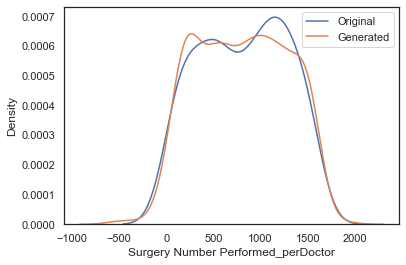

In [100]:
ax=sns.kdeplot(data_2_surgeon['Surgery Number Performed_perDoctor'].astype(int).reset_index(drop=True), label="Original")
sns.kdeplot(df_data_new_2_surgeons['Surgery Number Performed_perDoctor'].reset_index(drop=True), label="Generated")
ax.legend()
plt.show()

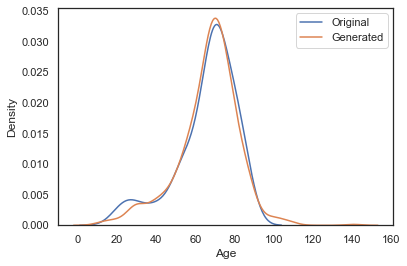

In [101]:
ax=sns.kdeplot(data_2_surgeon['Age'].reset_index(drop=True), label="Original")
sns.kdeplot(df_data_new_2_surgeons['Age'].reset_index(drop=True), label="Generated")
ax.legend()
plt.show()

In [102]:

df_data_new_2_surgeons['Procedures_I']=df_data_new_2_surgeons['Procedures_I'].round()
df_data_new_2_surgeons['Surgery Number Performed_perDoctor']=df_data_new_2_surgeons['Surgery Number Performed_perDoctor'].round()
df_data_new_2_surgeons['Daily Surgery Number_perDoctor']=df_data_new_2_surgeons['Daily Surgery Number_perDoctor'].round()

In [105]:
df_data_new_2_surgeons['Gender']=df_data_new_2_surgeons['Gender'].apply(round0_1)    
df_data_new_2_surgeons['Hospitalization']=df_data_new_2_surgeons['Hospitalization'].apply(round0_1)  
df_data_new_2_surgeons['Urgency']=df_data_new_2_surgeons['Urgency'].apply(round0_1)

### 2.2. Generate data to class 3 <a class="anchor" id="2.2"></a> 

In [106]:
#Gaussian mixtures


n_components_surgeon = np.arange(1, 40,1)

model_sph_3_surgeon = [GMM(n, covariance_type='spherical', random_state=0).fit(data_3_surgeon)
          for n in n_components_surgeon]
aics_sph_3_surgeon = [m.aic(data_3_surgeon) for m in model_sph_3_surgeon]
bics_sph_3_surgeon = [m.bic(data_3_surgeon) for m in model_sph_3_surgeon]

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


In [107]:
model_dig_3_surgeon = [GMM(n, covariance_type='diag', random_state=0).fit(data_3_surgeon)
          for n in n_components_surgeon]
aics_dig_3_surgeon = [m.aic(data_3_surgeon) for m in model_dig_3_surgeon]
bics_dig_3_surgeon = [m.bic(data_3_surgeon) for m in model_dig_3_surgeon]

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


In [100]:
model_full_3_surgeon = [GMM(n, covariance_type='full', random_state=0).fit(data_3_surgeon)
          for n in n_components_surgeon]
aics_full_3_surgeon = [m.aic(data_3_surgeon) for m in model_full_3_surgeon]
bics_full_3_surgeon = [m.bic(data_3_surgeon) for m in model_full_3_surgeon]

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


In [101]:
model_tied_3_surgeon = [GMM(n, covariance_type='tied', random_state=0).fit(data_3_surgeon)
          for n in n_components_surgeon]
aics_tied_3_surgeon = [m.aic(data_3_surgeon) for m in model_tied_3_surgeon]
bics_tied_3_surgeon = [m.bic(data_3_surgeon) for m in model_tied_3_surgeon]

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


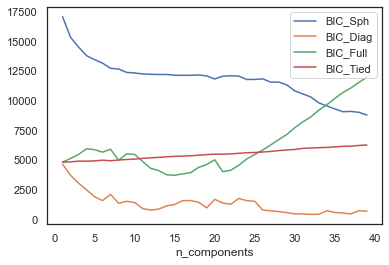

In [102]:
plt.plot(n_components_surgeon, bics_sph_3_surgeon, label='BIC_Sph')
plt.plot(n_components_surgeon, bics_dig_3_surgeon, label='BIC_Diag')
plt.plot(n_components_surgeon, bics_full_3_surgeon, label='BIC_Full')
plt.plot(n_components_surgeon, bics_tied_3_surgeon, label='BIC_Tied')
plt.legend(loc='upper right')
plt.xlabel('n_components');

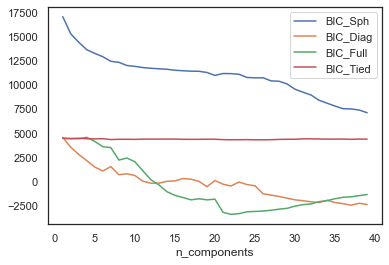

In [103]:
plt.plot(n_components_surgeon, aics_sph_3_surgeon, label='BIC_Sph')
plt.plot(n_components_surgeon, aics_dig_3_surgeon, label='BIC_Diag')
plt.plot(n_components_surgeon, aics_full_3_surgeon, label='BIC_Full')
plt.plot(n_components_surgeon, aics_tied_3_surgeon, label='BIC_Tied')
plt.legend(loc='upper right')
plt.xlabel('n_components');

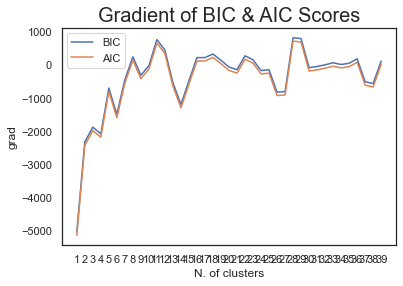

In [108]:
plt.errorbar(n_components_surgeon, np.gradient(bics_dig_3_surgeon), label='BIC')
plt.errorbar(n_components_surgeon, np.gradient(aics_dig_3_surgeon), label='AIC')
plt.title("Gradient of BIC & AIC Scores", fontsize=20)
plt.xticks(n_components_surgeon)
plt.xlabel("N. of clusters")
plt.ylabel("grad")
plt.legend()

In [109]:
bestmodel_3_surgeon=n_components_surgeon[np.argmin(bics_dig_3_surgeon)]
bestmodel_3_surgeon

28

In [110]:
gmm_mnist_3_surgeon = GMM(n_components_surgeon[np.argmin(bics_dig_3_surgeon)], covariance_type='diag')
gmm_mnist_3_surgeon.fit(data_3_surgeon)

print(gmm_mnist_3_surgeon.converged_)

True


In [111]:
gmm_labels_3_surgeon = gmm_mnist_3_surgeon.fit_predict(data_3_surgeon)
gmm_labels_3_surgeon

array([12, 12, 14, 26, 12, 12, 20, 12, 12, 12, 16,  1, 24, 12, 12, 12, 10,
        4, 12,  1, 12, 12, 12, 19,  1,  4, 12, 12, 18,  4, 12,  1,  5, 12,
        8,  7, 10, 12, 12, 12, 12, 16, 12,  5,  0,  5,  4, 12, 21, 12,  8,
       12, 12, 12, 14, 12,  4, 26, 13, 10, 12, 10, 11,  1,  1,  1, 26, 12,
       12, 12,  1,  0,  4,  3, 22, 12,  2, 12,  7,  1,  1, 22, 12, 12, 12,
       12, 27, 12, 12, 12,  4, 12,  1, 12, 12,  7, 12,  1,  1, 12, 18, 26,
        4,  1,  4, 12, 15, 15,  6,  9, 12, 12, 12, 12, 12, 17,  4, 26, 12,
       12, 12, 26, 12, 22, 12, 12, 15, 12, 12,  6, 20, 12, 12, 23, 26, 12,
       10,  6, 15, 12, 16, 16, 11, 12, 12,  1, 12, 14, 19, 26, 17,  3, 12,
       25, 26,  1, 21, 12, 25,  1, 12,  5, 23,  4, 12,  4, 12, 12,  6,  4,
        1, 12,  4, 24,  4, 26, 13, 21, 12,  2, 12, 12, 12, 12, 12, 12, 12,
       12,  1, 12,  4, 12, 12, 12,  4, 12, 25, 13,  4, 12,  4,  9,  1, 17],
      dtype=int64)

In [112]:
df_concat_gmm_3_surgeons= pd.concat([data_3_surgeon, pd.Series(gmm_labels_3_surgeon, index=data_3_surgeon.index, name="gmm_labels")], axis=1)
df_concat_gmm_3_surgeons

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,I1,Part of the day,Speciality,CUF_Unit,Month,Weekday,Anesthesia,gmm_labels
793,0,0,1,2,632,1,46,61.0,53.745098,28.212867,28.922468,28.931225,32.651163,29.081590,49.927586,12
278,0,0,1,5,51,1,67,61.0,53.745098,28.212867,28.922468,28.931225,28.039216,28.663239,49.927586,12
1314,0,1,1,1,1300,1,63,101.0,22.274376,28.212867,28.922468,28.931225,29.500000,29.081590,49.927586,14
196,0,0,0,3,125,1,54,67.0,36.657619,28.212867,28.922468,28.931225,30.870968,29.081590,49.927586,26
218,0,0,1,3,382,1,73,43.0,53.745098,28.212867,28.922468,28.931225,27.347826,28.663239,49.927586,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0,1,1,4,686,1,54,64.0,53.745098,28.212867,28.922468,28.931225,28.581395,28.663239,49.927586,12
1313,0,1,0,1,1402,1,46,59.0,53.745098,27.390625,28.922468,28.931225,32.651163,28.663239,49.927586,4
1152,0,1,0,1,1216,1,60,70.0,53.745098,28.212867,28.922468,28.931225,27.347826,28.526646,49.927586,9
1533,0,1,1,5,1444,1,47,82.0,53.745098,42.573529,28.922468,28.931225,31.794393,29.081590,49.927586,1


* Generate Points

In [113]:
n_synthetic_points_3_surgeons=len(data_1_surgeon)-len(data_3_surgeon)
print('Number of points generated:',n_synthetic_points_3_surgeons)

Number of points generated: 647


In [114]:
# Now we have the model of the data we can generate synthetic datasets!
data_new_3_surgeons,y_3_surgeons = gmm_mnist_3_surgeon.sample(n_synthetic_points_3_surgeons)
data_new_3_surgeons.shape

(647, 15)

In [115]:


df_data_new_3_surgeons=pd.DataFrame(data_new_3_surgeons,columns=columns_surgeons)
df_data_new_3_surgeons

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,I1,Part of the day,Speciality,CUF_Unit,Month,Weekday,Anesthesia
0,-0.001217,0.998426,0.000796,3.961394,660.696483,1.000394,67.241956,85.783760,41.505957,28.211266,28.922076,28.931470,32.227412,28.735323,22.730454
1,0.000175,0.999905,-0.000578,4.786070,666.860917,1.000055,58.890237,72.531997,35.593146,28.211229,28.921317,28.931515,31.735770,28.536462,22.732742
2,0.000624,0.998935,-0.002199,0.042412,642.949338,1.000411,34.333919,78.737581,37.938071,28.214599,28.923432,28.930237,31.666296,29.062952,22.731559
3,-0.000314,0.999761,0.001507,4.361660,662.484575,1.001280,49.770778,75.464656,23.365081,28.213135,28.923188,28.931727,32.267566,28.585008,22.730603
4,0.000203,1.000050,-0.001231,1.753694,657.278022,1.000183,55.268528,83.433262,38.830914,28.213030,28.921285,28.931861,32.474716,28.759772,22.729556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,-0.000499,0.017606,-0.000675,3.316469,86.282709,1.000680,59.722282,59.167643,46.984697,26.394988,28.923241,28.929945,28.688599,28.803780,49.927011
643,-0.000220,0.368128,0.000133,2.981451,995.335525,0.999982,68.280774,66.429116,55.235109,33.793054,28.922391,28.933657,27.498089,28.716364,49.928129
644,-0.000211,0.187485,0.000486,3.013362,-3.083281,1.001384,52.116797,65.016700,80.656452,36.063446,28.922911,28.931474,31.506903,28.557917,49.926126
645,0.000229,1.000712,1.000258,2.998794,737.000495,1.999899,149.999367,66.998721,59.525688,28.212660,28.924748,28.931908,30.508316,28.663046,22.729791


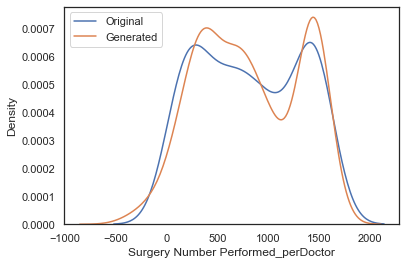

In [116]:
ax=sns.kdeplot(data_3_surgeon['Surgery Number Performed_perDoctor'].astype(int).reset_index(drop=True), label="Original")
sns.kdeplot(df_data_new_3_surgeons['Surgery Number Performed_perDoctor'].reset_index(drop=True), label="Generated")
ax.legend()
plt.show()

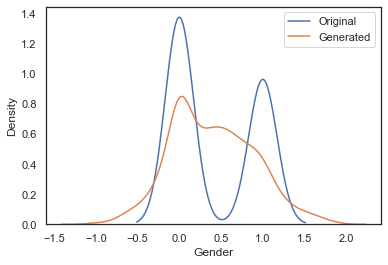

In [117]:
ax=sns.kdeplot(data_3_surgeon['Gender'].reset_index(drop=True), label="Original")
sns.kdeplot(df_data_new_3_surgeons['Gender'].reset_index(drop=True), label="Generated")
ax.legend()
plt.show()

In [118]:
df_data_new_3_surgeons['Procedures_I']=df_data_new_3_surgeons['Procedures_I'].round()
df_data_new_3_surgeons['Daily Surgery Number_perDoctor']=df_data_new_3_surgeons['Daily Surgery Number_perDoctor'].round()
df_data_new_3_surgeons['Surgery Number Performed_perDoctor']=df_data_new_3_surgeons['Surgery Number Performed_perDoctor'].round()
df_data_new_3_surgeons['Gender']=df_data_new_3_surgeons['Gender'].apply(round0_1)    
df_data_new_3_surgeons['Hospitalization']=df_data_new_3_surgeons['Hospitalization'].apply(round0_1)  
df_data_new_3_surgeons['Urgency']=df_data_new_3_surgeons['Urgency'].apply(round0_1)


### 2.3. Save synthetic data<a class="anchor" id="2.3"></a> 

In [119]:
df_data_new_2_surgeons.to_csv('Data2_synthetic_surgeons',index=False)

In [120]:
df_data_new_3_surgeons.to_csv('Data3_synthetic_surgeons',index=False)



### 2.4. Concatenate and randomize data <a class="anchor" id="2.4"></a> 

In [121]:
df_data_new_3_surgeons

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,I1,Part of the day,Speciality,CUF_Unit,Month,Weekday,Anesthesia
0,0,1,0,4.0,661.0,1.0,67.241956,85.783760,41.505957,28.211266,28.922076,28.931470,32.227412,28.735323,22.730454
1,0,1,0,5.0,667.0,1.0,58.890237,72.531997,35.593146,28.211229,28.921317,28.931515,31.735770,28.536462,22.732742
2,0,1,0,0.0,643.0,1.0,34.333919,78.737581,37.938071,28.214599,28.923432,28.930237,31.666296,29.062952,22.731559
3,0,1,0,4.0,662.0,1.0,49.770778,75.464656,23.365081,28.213135,28.923188,28.931727,32.267566,28.585008,22.730603
4,0,1,0,2.0,657.0,1.0,55.268528,83.433262,38.830914,28.213030,28.921285,28.931861,32.474716,28.759772,22.729556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,0,0,0,3.0,86.0,1.0,59.722282,59.167643,46.984697,26.394988,28.923241,28.929945,28.688599,28.803780,49.927011
643,0,0,0,3.0,995.0,1.0,68.280774,66.429116,55.235109,33.793054,28.922391,28.933657,27.498089,28.716364,49.928129
644,0,0,0,3.0,-3.0,1.0,52.116797,65.016700,80.656452,36.063446,28.922911,28.931474,31.506903,28.557917,49.926126
645,0,1,1,3.0,737.0,2.0,149.999367,66.998721,59.525688,28.212660,28.924748,28.931908,30.508316,28.663046,22.729791


In [122]:
Data_withsyntheticdata_surgeon = pd.concat([data_1_surgeon, data_2_surgeon,data_3_surgeon,df_data_new_2_surgeons,df_data_new_3_surgeons], axis=0)

In [123]:
Data_withsyntheticdata_surgeon

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,I1,Part of the day,Speciality,CUF_Unit,Month,Weekday,Anesthesia
385,0,1,1,2,117,1.0,15.000000,70.000000,20,22.274376,28.212867,28.922468,28.931225,25.790476,29.081590,22.730851
676,0,1,1,3,706,2.0,18.000000,84.000000,20,22.274376,28.212867,28.922468,28.931225,28.581395,29.081590,22.730851
1224,0,1,0,3,1238,1.0,25.000000,58.000000,30,22.274376,28.212867,28.922468,28.931225,26.371429,28.663239,22.730851
1101,0,1,0,1,860,1.0,15.000000,87.000000,20,22.274376,28.212867,28.922468,28.931225,29.500000,28.663239,22.730851
31,0,1,0,4,58,1.0,15.000000,77.000000,20,22.274376,28.212867,28.922468,28.931225,28.039216,29.081590,22.730851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,0,0,0,3.0,86.0,1.0,59.722282,59.167643,<NA>,46.984697,26.394988,28.923241,28.929945,28.688599,28.803780,49.927011
643,0,0,0,3.0,995.0,1.0,68.280774,66.429116,<NA>,55.235109,33.793054,28.922391,28.933657,27.498089,28.716364,49.928129
644,0,0,0,3.0,-3.0,1.0,52.116797,65.016700,<NA>,80.656452,36.063446,28.922911,28.931474,31.506903,28.557917,49.926126
645,0,1,1,3.0,737.0,2.0,149.999367,66.998721,<NA>,59.525688,28.212660,28.924748,28.931908,30.508316,28.663046,22.729791


In [124]:
Data_withsyntheticdata_surgeon.shape

(2553, 16)

In [125]:
Data_withsyntheticdata_surgeon = Data_withsyntheticdata_surgeon.sample(frac=1)

In [126]:
Data_withsyntheticdata_surgeon=Data_withsyntheticdata_surgeon[Data_withsyntheticdata_surgeon['Real Room Duration']>5]
Data_withsyntheticdata_surgeon=Data_withsyntheticdata_surgeon[Data_withsyntheticdata_surgeon['Age']>0]
Data_withsyntheticdata_surgeon=Data_withsyntheticdata_surgeon[Data_withsyntheticdata_surgeon['Procedures_I']>0]
Data_withsyntheticdata_surgeon=Data_withsyntheticdata_surgeon[Data_withsyntheticdata_surgeon['Daily Surgery Number_perDoctor']>0]
Data_withsyntheticdata_surgeon=Data_withsyntheticdata_surgeon[Data_withsyntheticdata_surgeon['Surgery Number Performed_perDoctor']>0]
Data_withsyntheticdata_surgeon=Data_withsyntheticdata_surgeon[Data_withsyntheticdata_surgeon['I1']>0]

In [127]:
Data_withsyntheticdata_surgeon.to_csv('Data_withsyntheticdata_surgeon',index=False)

In [128]:
test_dataset_surgeon.to_csv('Data_test_surgeon',index=False)

----



## 3  Speciality Case | Ophthalmology <a class="anchor" id="3"></a> 

### Separte into 3 classes: two of them minority

In [63]:
position = np.where(list_specialities == 'Ophthalmology')[0][0]

In [46]:
train_dataset_speciality=Specialities_Dataset[list_specialities[position]]['TrainSet']
test_dataset_speciality=Specialities_Dataset[list_specialities[position]]['TestSet']

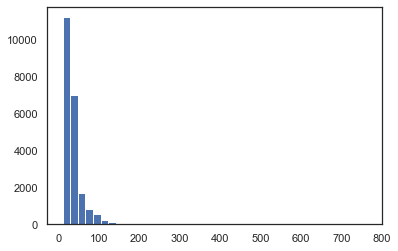

In [32]:
x = train_dataset_speciality['Real Room Duration']
plt.hist(x, bins = 40)
plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'Surgery Duration (minutes)')

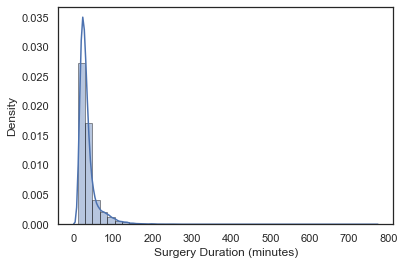

In [33]:
sns.distplot(x, hist=True, bins=40,hist_kws={'edgecolor':'black'})
plt.xlabel('Surgery Duration (minutes)')

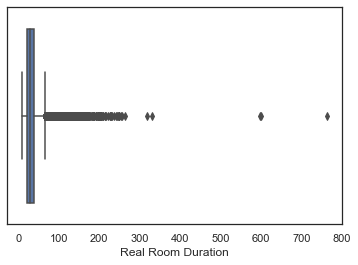

In [34]:
import seaborn as sns
sns.set_theme(style="white")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=train_dataset_speciality['Real Room Duration'])

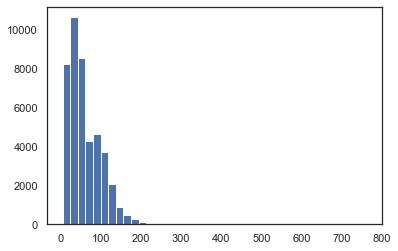

In [35]:
df_train = pd.read_csv('Data_withsyntheticdata_speciality',header='infer')


x = df_train['Real Room Duration']
plt.hist(x, bins = 40)
plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'Surgery Duration (minutes)')

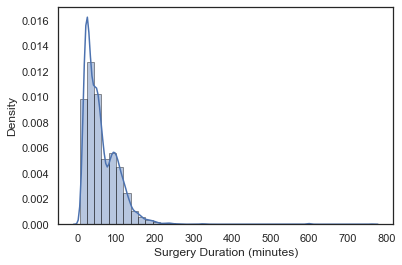

In [36]:
sns.distplot(x, hist=True, bins=40,hist_kws={'edgecolor':'black'})
plt.xlabel('Surgery Duration (minutes)')

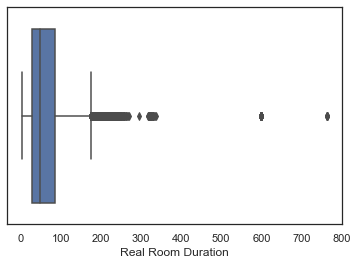

In [37]:
import seaborn as sns
sns.set_theme(style="white")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x= df_train['Real Room Duration'])

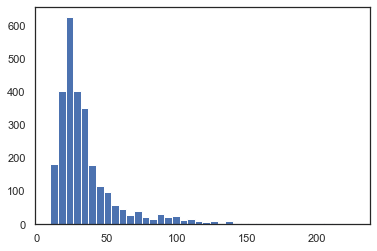

In [38]:
x = test_dataset_speciality['Real Room Duration']
plt.hist(x, bins = 40)
plt.show()

In [145]:
x.mode()

0    25
dtype: int64

In [146]:
x.mean()

35.964822279223156

In [147]:
data_1_speciality=train_dataset_speciality[train_dataset_speciality['Real Room Duration']<=40]
data_1_speciality

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,Doctor,CUF_Unit,Part of the day,I1,Month,Weekday,Anesthesia
9459,0,1,1,6,220,1,31,85.0,30,24.629243,33.228385,33.029912,29.399988,35.055131,32.554100,28.201140
11956,0,1,0,2,715,1,24,92.0,20,28.728209,35.808129,39.423691,29.399988,34.790614,35.058103,53.486158
4534,0,1,0,2,218,1,35,87.0,20,28.728209,35.808129,39.423691,29.399988,35.937566,35.058103,30.848830
3544,0,1,0,1,10,2,24,82.0,30,21.333333,33.228385,33.029912,29.399988,33.255834,32.554100,28.201140
23716,0,1,1,1,236,1,19,70.0,30,24.434579,29.894079,33.029912,29.399988,34.802770,32.554100,53.486158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9034,0,1,1,1,13,1,19,66.0,30,24.539683,29.894079,32.937803,38.063291,33.255834,32.554100,53.486158
6083,0,1,1,1,12,1,15,79.0,30,37.604871,35.808129,39.423691,24.361681,35.055131,40.010771,28.201140
16503,0,1,1,5,177,2,16,74.0,30,32.220183,33.228385,39.423691,29.399988,37.007716,32.554100,28.201140
3624,0,1,0,12,25,1,27,57.0,30,40.650446,44.346674,36.551606,29.399988,36.000000,34.884527,43.161074


In [148]:
data_2_speciality=train_dataset_speciality[train_dataset_speciality['Real Room Duration']>40][train_dataset_speciality['Real Room Duration']<=80]
data_2_speciality

Boolean Series key will be reindexed to match DataFrame index.


,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,Doctor,CUF_Unit,Part of the day,I1,Month,Weekday,Anesthesia
11276,0,1,0,4,144,1,41,73.0,60,33.438172,35.808129,33.029912,29.399988,37.007716,35.058103,30.848830
16398,0,1,1,3,145,2,49,72.0,30,32.220183,33.228385,39.423691,83.202020,36.000000,32.554100,28.201140
16618,0,1,1,1,42,2,47,69.0,30,24.561404,33.228385,33.029912,29.399988,37.007716,32.554100,28.201140
18002,0,1,0,2,6,1,47,47.0,60,38.476190,35.808129,36.551606,29.399988,34.384065,36.602331,53.486158
557,0,1,0,1,17,1,52,83.0,60,46.200000,37.703783,36.551606,29.399988,35.055131,34.884527,53.486158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18135,0,1,1,1,365,1,50,74.0,45,34.839928,35.808129,33.029912,29.399988,35.937566,40.010771,28.201140
21499,0,1,1,1,155,1,46,69.0,30,24.158730,28.233843,33.029912,29.399988,36.893540,35.058103,28.201140
9106,0,1,1,2,47,1,45,62.0,60,29.968750,29.894079,36.551606,29.399988,35.055131,32.554100,30.848830
22862,0,1,0,2,140,1,60,2.0,60,60.986486,33.228385,32.937803,38.063291,35.055131,35.058103,53.486158


In [149]:
data_3_speciality=train_dataset_speciality[train_dataset_speciality['Real Room Duration']>80]
data_3_speciality

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,Doctor,CUF_Unit,Part of the day,I1,Month,Weekday,Anesthesia
16343,0,1,1,1,6,2,87,5.0,60,64.965296,33.228385,32.937803,86.487544,36.893540,40.010771,53.486158
12530,0,1,0,2,20,1,123,69.0,60,40.379310,35.808129,32.937803,72.255539,34.802770,35.058103,53.486158
22561,0,1,0,2,159,3,199,68.0,150,81.762712,28.233843,36.551606,97.193359,36.000000,34.884527,53.486158
26085,0,1,0,2,14,1,91,58.0,60,38.476190,35.808129,36.551606,29.399988,35.937566,36.602331,30.848830
17265,0,1,1,1,114,2,98,51.0,90,81.762712,44.346674,33.029912,95.000000,35.862680,32.363592,53.486158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23482,0,1,1,1,170,2,116,6.0,60,68.134752,33.228385,33.029912,86.487544,33.255834,35.058103,53.486158
8861,0,1,0,7,267,1,85,76.0,30,24.627451,33.228385,32.937803,29.399988,34.802770,36.602331,53.486158
24452,0,1,1,1,94,1,91,5.0,90,83.112360,44.346674,36.551606,87.320513,35.055131,36.602331,53.486158
10572,0,1,1,2,12,2,129,5.0,120,97.400000,44.346674,33.029912,86.487544,35.937566,32.363592,53.486158


In [150]:
data_3_speciality.pop('CUF Planned Duration')
data_2_speciality.pop('CUF Planned Duration')
columns_specialities=data_2_speciality.columns
columns_specialities

Index(['Urgency', 'Hospitalization', 'Gender',
       'Daily Surgery Number_perDoctor', 'Surgery Number Performed_perDoctor',
       'Procedures_I', 'Real Room Duration', 'Age', 'Doctor', 'CUF_Unit',
       'Part of the day', 'I1', 'Month', 'Weekday', 'Anesthesia'],
      dtype='object')

### Gaussian mixtures

### 3.1. Generate data to class 2 <a class="anchor" id="3.1"></a> 

In [154]:
#Gaussian mixtures


n_components_speciality = np.arange(1, 300,7)

model_sph_2_speciality = [GMM(n, covariance_type='spherical', random_state=0,max_iter=300).fit(data_2_speciality)
          for n in n_components_speciality]
aics_sph_2_speciality = [m.aic(data_2_speciality) for m in model_sph_2_speciality]
bics_sph_2_speciality = [m.bic(data_2_speciality) for m in model_sph_2_speciality]

In [155]:
model_dig_2_speciality = [GMM(n, covariance_type='diag', random_state=0).fit(data_2_speciality)
          for n in n_components_speciality]
aics_dig_2_speciality = [m.aic(data_2_speciality) for m in model_dig_2_speciality]
bics_dig_2_speciality = [m.bic(data_2_speciality) for m in model_dig_2_speciality]

In [156]:
model_full_2_speciality = [GMM(n, covariance_type='full', random_state=0).fit(data_2_speciality)
          for n in n_components_speciality]
aics_full_2_speciality = [m.aic(data_2_speciality) for m in model_full_2_speciality]
bics_full_2_speciality = [m.bic(data_2_speciality) for m in model_full_2_speciality]

In [157]:


model_tied_2_speciality = [GMM(n, covariance_type='tied', random_state=0).fit(data_2_speciality)
          for n in n_components_speciality]
aics_tied_2_speciality = [m.aic(data_2_speciality) for m in model_tied_2_speciality]
bics_tied_2_speciality = [m.bic(data_2_speciality) for m in model_tied_2_speciality]

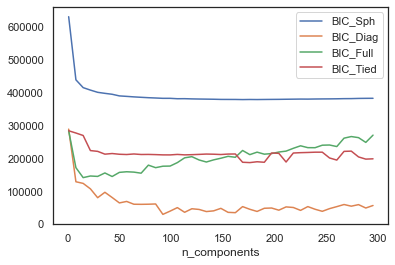

In [158]:
plt.plot(n_components_speciality, bics_sph_2_speciality, label='BIC_Sph')
plt.plot(n_components_speciality, bics_dig_2_speciality, label='BIC_Diag')
plt.plot(n_components_speciality, bics_full_2_speciality, label='BIC_Full')
plt.plot(n_components_speciality, bics_tied_2_speciality, label='BIC_Tied')
plt.legend(loc='upper right')
plt.xlabel('n_components');

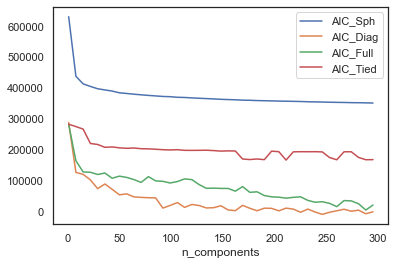

In [159]:
plt.plot(n_components_speciality, aics_sph_2_speciality, label='AIC_Sph')
plt.plot(n_components_speciality, aics_dig_2_speciality, label='AIC_Diag')
plt.plot(n_components_speciality, aics_full_2_speciality, label='AIC_Full')
plt.plot(n_components_speciality, aics_tied_2_speciality, label='AIC_Tied')
plt.legend(loc='upper right')
plt.xlabel('n_components');

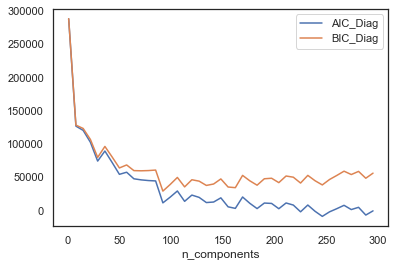

In [160]:

plt.plot(n_components_speciality, aics_dig_2_speciality, label='AIC_Diag')
plt.plot(n_components_speciality, bics_dig_2_speciality, label='BIC_Diag')
plt.legend(loc='upper right')
plt.xlabel('n_components');

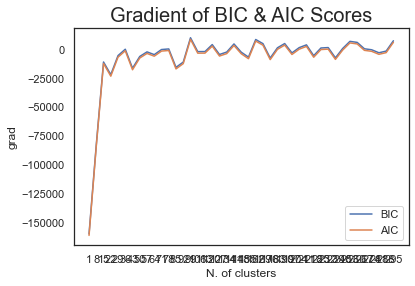

In [161]:
plt.errorbar(n_components_speciality, np.gradient(bics_dig_2_speciality), label='BIC')
plt.errorbar(n_components_speciality, np.gradient(aics_dig_2_speciality), label='AIC')
plt.title("Gradient of BIC & AIC Scores", fontsize=20)
plt.xticks(n_components_speciality)
plt.xlabel("N. of clusters")
plt.ylabel("grad")
plt.legend()

In [162]:
bestmodel_2_speciality=n_components_speciality[np.argmin(bics_dig_2_speciality)]
bestmodel_2_speciality

92

In [163]:
gmm_mnist_2_speciality = GMM(n_components_speciality[np.argmin(bics_dig_2_speciality)], covariance_type='diag')
gmm_mnist_2_speciality.fit(data_2_speciality)

print(gmm_mnist_2_speciality.converged_)

True


In [164]:
gmm_labels_2_speciality = gmm_mnist_2_speciality.fit_predict(data_2_speciality)
gmm_labels_2_speciality

array([29, 15,  4, ..., 29, 86, 69], dtype=int64)

In [165]:
df_concat_gmm_2_speciality= pd.concat([data_2_speciality, pd.Series(gmm_labels_2_speciality, index=data_2_speciality.index, name="gmm_labels")], axis=1)
df_concat_gmm_2_speciality

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,Doctor,CUF_Unit,Part of the day,I1,Month,Weekday,Anesthesia,gmm_labels
11276,0,1,0,4,144,1,41,73.0,33.438172,35.808129,33.029912,29.399988,37.007716,35.058103,30.848830,29
16398,0,1,1,3,145,2,49,72.0,32.220183,33.228385,39.423691,83.202020,36.000000,32.554100,28.201140,15
16618,0,1,1,1,42,2,47,69.0,24.561404,33.228385,33.029912,29.399988,37.007716,32.554100,28.201140,4
18002,0,1,0,2,6,1,47,47.0,38.476190,35.808129,36.551606,29.399988,34.384065,36.602331,53.486158,64
557,0,1,0,1,17,1,52,83.0,46.200000,37.703783,36.551606,29.399988,35.055131,34.884527,53.486158,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18135,0,1,1,1,365,1,50,74.0,34.839928,35.808129,33.029912,29.399988,35.937566,40.010771,28.201140,80
21499,0,1,1,1,155,1,46,69.0,24.158730,28.233843,33.029912,29.399988,36.893540,35.058103,28.201140,35
9106,0,1,1,2,47,1,45,62.0,29.968750,29.894079,36.551606,29.399988,35.055131,32.554100,30.848830,29
22862,0,1,0,2,140,1,60,2.0,60.986486,33.228385,32.937803,38.063291,35.055131,35.058103,53.486158,86


* Generate Synthetic Points

In [166]:
n_synthetic_points_2_speciality=len(data_1_speciality)-len(data_2_speciality)
print('Number of points generated:',n_synthetic_points_2_speciality)

Number of points generated: 13275


In [167]:
# Now we have the model of the data we can generate synthetic datasets!
data_new_2_speciality,y_2_speciality = gmm_mnist_2_speciality.sample(n_synthetic_points_2_speciality)
data_new_2_speciality.shape

(13275, 15)

In [168]:


df_data_new_2_speciality=pd.DataFrame(data_new_2_speciality,columns=columns_specialities)
df_data_new_2_speciality

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,Doctor,CUF_Unit,Part of the day,I1,Month,Weekday,Anesthesia
0,0.832096,0.675985,1.001300,0.872051,100.073920,1.001685,43.324761,64.900015,32.247883,27.527767,34.903211,29.399735,34.816709,40.873653,28.200703
1,0.848786,-0.010107,0.998796,1.585291,106.505385,1.000228,41.414815,65.551358,29.027880,26.441453,35.409202,29.399541,35.476396,38.940566,28.200356
2,1.014510,-0.481298,0.999707,2.735257,104.418015,0.999700,42.132430,74.222991,31.302311,25.448736,35.014586,29.399207,36.963764,41.015823,28.201961
3,0.221725,0.290115,0.999490,1.361327,107.047535,1.001273,43.143883,66.664083,30.010133,27.549603,35.282679,29.400822,35.191402,40.402621,28.202232
4,0.537770,0.381792,1.000220,1.235884,108.218636,0.999672,41.033721,67.718911,35.229315,28.015268,33.476313,29.399637,36.013477,35.977712,28.202071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13270,-0.000057,0.999718,1.127954,2.473687,6.958214,1.001653,63.252780,92.707776,36.382051,44.348190,32.996497,25.006973,36.270029,34.102671,53.241836
13271,-0.000383,1.001691,0.228567,2.951614,121.808226,1.001137,59.151907,78.709860,33.639010,44.347421,32.977813,27.058688,35.871588,36.662134,53.241878
13272,0.001676,1.001758,0.791122,-1.553072,64.381245,1.000132,52.541127,94.659771,31.983218,44.346337,32.982355,25.916887,36.953110,35.326939,53.240740
13273,-0.001651,0.998363,0.345326,-1.637577,-5.138053,1.000457,37.542136,75.333461,38.034890,44.344965,32.937047,26.350890,35.599763,34.811406,53.241474


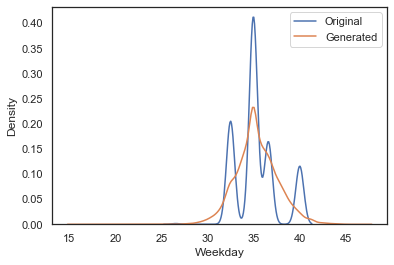

In [169]:
ax=sns.kdeplot(data_2_speciality['Weekday'].reset_index(drop=True), label="Original")
sns.kdeplot(df_data_new_2_speciality['Weekday'].reset_index(drop=True), label="Generated")
ax.legend()
plt.show()

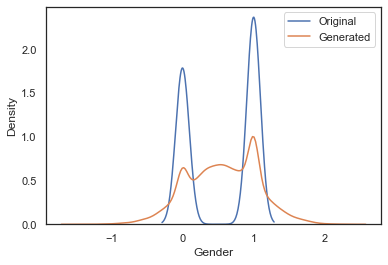

In [170]:
ax=sns.kdeplot(data_2_speciality['Gender'].reset_index(drop=True), label="Original")
sns.kdeplot(df_data_new_2_speciality['Gender'].reset_index(drop=True), label="Generated")
ax.legend()
plt.show()

In [171]:
def round0_1(x):
    
    value_1=abs(1-x)
    value_2=abs(x)
    
    if value_1>value_2:
        return 0
    
    else:
        return 1
    
    

In [172]:
df_data_new_2_speciality['Gender']=df_data_new_2_speciality['Gender'].apply(round0_1)

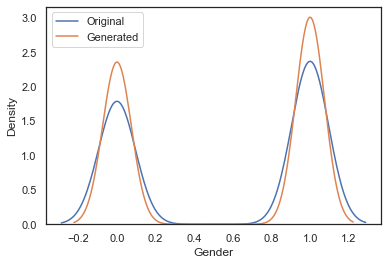

In [173]:
ax=sns.kdeplot(data_2_speciality['Gender'].reset_index(drop=True), label="Original")
sns.kdeplot(df_data_new_2_speciality['Gender'].reset_index(drop=True), label="Generated")
ax.legend()
plt.show()

In [174]:
df_data_new_2_speciality['Procedures_I']=df_data_new_2_speciality['Procedures_I'].round() 
df_data_new_2_speciality['Surgery Number Performed_perDoctor']=df_data_new_2_speciality['Surgery Number Performed_perDoctor'].round() 
df_data_new_2_speciality['Daily Surgery Number_perDoctor']=df_data_new_2_speciality['Daily Surgery Number_perDoctor'].round() 
df_data_new_2_speciality['Hospitalization']=df_data_new_2_speciality['Hospitalization'].apply(round0_1)  
df_data_new_2_speciality['Urgency']=df_data_new_2_speciality['Urgency'].apply(round0_1)

### 3.2. Generate data to class 3 <a class="anchor" id="3.2"></a> 

In [175]:
#Gaussian mixtures


n_components_speciality_3 = np.arange(1, 300,7)

model_sph_3_speciality = [GMM(n, covariance_type='spherical', random_state=0).fit(data_3_speciality)
          for n in n_components_speciality_3]
aics_sph_3_speciality = [m.aic(data_3_speciality) for m in model_sph_3_speciality]
bics_sph_3_speciality = [m.bic(data_3_speciality) for m in model_sph_3_speciality]

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.


In [176]:
model_dig_3_speciality = [GMM(n, covariance_type='diag', random_state=0).fit(data_3_speciality)
          for n in n_components_speciality_3]
aics_dig_3_speciality = [m.aic(data_3_speciality) for m in model_dig_3_speciality]
bics_dig_3_speciality = [m.bic(data_3_speciality) for m in model_dig_3_speciality]

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.


In [177]:
model_full_3_speciality = [GMM(n, covariance_type='full', random_state=0).fit(data_3_speciality)
          for n in n_components_speciality_3]
aics_full_3_speciality = [m.aic(data_3_speciality) for m in model_full_3_speciality]
bics_full_3_speciality = [m.bic(data_3_speciality) for m in model_full_3_speciality]

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.


In [180]:


model_tied_3_speciality = [GMM(n, covariance_type='tied', random_state=0,max_iter=300).fit(data_3_speciality)
          for n in n_components_speciality_3]
aics_tied_3_speciality = [m.aic(data_3_speciality) for m in model_tied_3_speciality]
bics_tied_3_speciality = [m.bic(data_3_speciality) for m in model_tied_3_speciality]

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.


Text(0, 0.5, 'BIC Score')

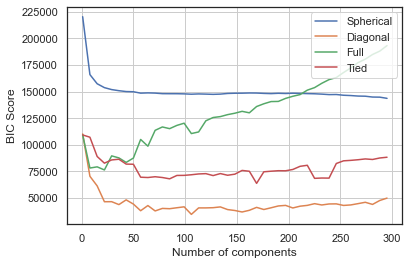

In [181]:
plt.plot(n_components_speciality_3, bics_sph_3_speciality, label='Spherical')
plt.plot(n_components_speciality_3, bics_dig_3_speciality, label='Diagonal')
plt.plot(n_components_speciality_3, bics_full_3_speciality, label='Full')
plt.plot(n_components_speciality_3, bics_tied_3_speciality, label='Tied')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Number of components') 
plt.ylabel('BIC Score') 

Text(0, 0.5, 'AIC Score')

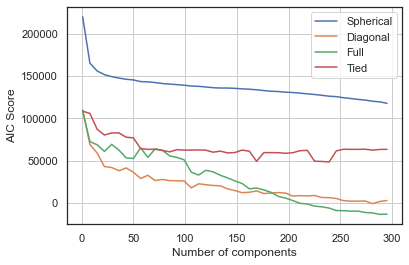

In [182]:
plt.plot(n_components_speciality_3, aics_sph_3_speciality, label='Spherical')
plt.plot(n_components_speciality_3, aics_dig_3_speciality, label='Diagonal')
plt.plot(n_components_speciality_3, aics_full_3_speciality, label='Full')
plt.plot(n_components_speciality_3, aics_tied_3_speciality, label='Tied')
plt.legend(loc='upper right')

plt.grid()
plt.xlabel('Number of components') 
plt.ylabel('AIC Score') 

Text(0, 0.5, 'Diagoanl Score')

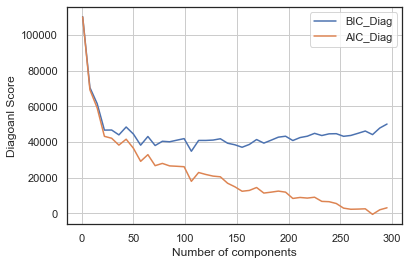

In [183]:

plt.plot(n_components_speciality_3, bics_dig_3_speciality, label='BIC_Diag')
plt.plot(n_components_speciality_3, aics_dig_3_speciality, label='AIC_Diag')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Number of components') 
plt.ylabel('Diagoanl Score') 

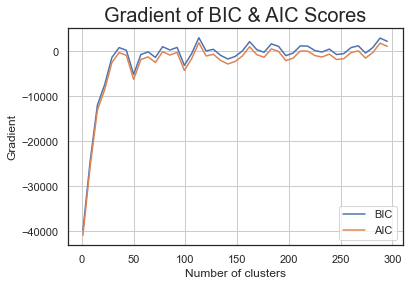

In [184]:
plt.errorbar(n_components_speciality_3, np.gradient(bics_dig_3_speciality), label='BIC')
plt.errorbar(n_components_speciality_3, np.gradient(aics_dig_3_speciality), label='AIC')
plt.title("Gradient of BIC & AIC Scores", fontsize=20)
plt.grid()
plt.xlabel("Number of clusters")
plt.ylabel("Gradient")
plt.legend()

In [185]:
bestmodel_3_speciality=n_components_speciality_3[np.argmin(bics_dig_3_speciality)]
bestmodel_3_speciality

106

In [186]:
gmm_mnist_3_speciality = GMM(n_components_speciality_3[np.argmin(bics_dig_3_speciality)], covariance_type='diag')
gmm_mnist_3_speciality.fit(data_3_speciality)

print(gmm_mnist_3_speciality.converged_)

True


In [187]:
gmm_labels_3_speciality = gmm_mnist_3_speciality.fit_predict(data_3_speciality)
gmm_labels_3_speciality

array([88, 50, 74, ..., 94, 24, 30], dtype=int64)

In [188]:
df_concat_gmm_3_speciality= pd.concat([data_3_speciality, pd.Series(gmm_labels_3_speciality, index=data_3_speciality.index, name="gmm_labels")], axis=1)
df_concat_gmm_3_speciality

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,Doctor,CUF_Unit,Part of the day,I1,Month,Weekday,Anesthesia,gmm_labels
16343,0,1,1,1,6,2,87,5.0,64.965296,33.228385,32.937803,86.487544,36.893540,40.010771,53.486158,88
12530,0,1,0,2,20,1,123,69.0,40.379310,35.808129,32.937803,72.255539,34.802770,35.058103,53.486158,50
22561,0,1,0,2,159,3,199,68.0,81.762712,28.233843,36.551606,97.193359,36.000000,34.884527,53.486158,74
26085,0,1,0,2,14,1,91,58.0,38.476190,35.808129,36.551606,29.399988,35.937566,36.602331,30.848830,100
17265,0,1,1,1,114,2,98,51.0,81.762712,44.346674,33.029912,95.000000,35.862680,32.363592,53.486158,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23482,0,1,1,1,170,2,116,6.0,68.134752,33.228385,33.029912,86.487544,33.255834,35.058103,53.486158,88
8861,0,1,0,7,267,1,85,76.0,24.627451,33.228385,32.937803,29.399988,34.802770,36.602331,53.486158,103
24452,0,1,1,1,94,1,91,5.0,83.112360,44.346674,36.551606,87.320513,35.055131,36.602331,53.486158,94
10572,0,1,1,2,12,2,129,5.0,97.400000,44.346674,33.029912,86.487544,35.937566,32.363592,53.486158,24


* Generate Synthetic Points

In [189]:
n_synthetic_points_3_speciality=len(data_1_speciality)-len(data_3_speciality)
print('Number of points generated:',n_synthetic_points_3_speciality)

Number of points generated: 15663


In [190]:
# Now we have the model of the data we can generate synthetic datasets!
data_new_3_speciality,y_3_speciality = gmm_mnist_3_speciality.sample(n_synthetic_points_3_speciality)
data_new_3_speciality.shape

(15663, 15)

In [191]:

df_data_new_3_speciality=pd.DataFrame(data_new_3_speciality,columns=columns_specialities)
df_data_new_3_speciality

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,Doctor,CUF_Unit,Part of the day,I1,Month,Weekday,Anesthesia
0,0.001066,0.736512,0.999758,2.029308,19.440114,0.126146,138.193256,69.908530,50.412901,44.346406,34.552427,95.014091,33.766917,31.503969,53.487254
1,-0.001116,0.671359,0.999652,0.990512,80.873942,1.579589,85.773837,32.793702,54.645631,44.347094,32.711696,75.914022,36.633588,34.955991,53.484681
2,-0.001216,0.673275,0.999691,1.181079,54.218560,3.319854,83.523919,60.197247,90.601431,44.346536,35.434841,91.668850,34.154812,33.477612,53.487858
3,0.000231,1.091222,0.999480,2.049861,47.987981,1.359255,109.413837,25.105429,61.679017,44.347527,35.862233,96.572970,34.164029,32.566024,53.486276
4,0.002354,0.439029,1.001236,1.522364,80.670968,1.728103,108.398865,35.954001,30.185640,44.349224,32.505863,80.392062,34.562780,33.449983,53.485816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15658,0.000819,0.286356,1.042518,1.630479,19.150183,1.509661,92.161257,49.880815,81.761977,30.850382,38.736958,64.099268,35.643750,35.699400,30.279446
15659,0.000200,0.914030,1.164293,2.100816,21.408858,0.987392,115.516248,40.409487,81.761579,49.326949,39.448067,43.456122,36.582043,35.915414,28.244476
15660,-0.001301,0.846760,0.594849,1.280788,10.343725,1.667513,93.572702,70.624939,81.764284,16.778931,41.180658,74.136488,35.473519,36.244553,30.500174
15661,0.000566,0.161821,0.044681,1.604088,-2.578767,1.890138,85.553700,46.261801,81.762008,42.850740,38.129376,16.150703,34.961049,35.087010,30.094587


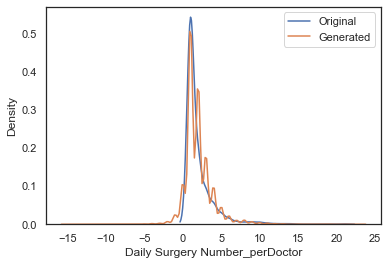

In [197]:
ax=sns.kdeplot(data_3_speciality['Daily Surgery Number_perDoctor'].astype(float).reset_index(drop=True), label="Original")
sns.kdeplot(df_data_new_3_speciality['Daily Surgery Number_perDoctor'].reset_index(drop=True), label="Generated")
ax.legend()
plt.show()

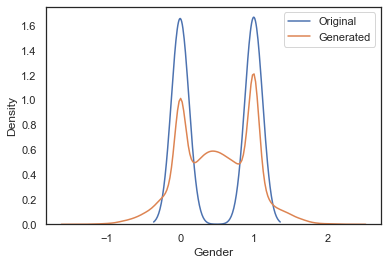

In [193]:
ax=sns.kdeplot(data_3_speciality['Gender'].reset_index(drop=True), label="Original")
sns.kdeplot(df_data_new_3_speciality['Gender'].reset_index(drop=True), label="Generated")
ax.legend()
plt.show()

In [194]:
df_data_new_3_speciality['Gender']=df_data_new_3_speciality['Gender'].apply(round0_1)

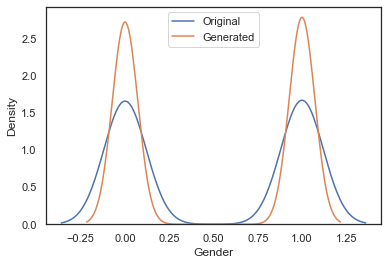

In [195]:
ax=sns.kdeplot(data_3_speciality['Gender'].reset_index(drop=True), label="Original")
sns.kdeplot(df_data_new_3_speciality['Gender'].reset_index(drop=True), label="Generated")
ax.legend()
plt.show()

In [196]:
df_data_new_3_speciality['Procedures_I']=df_data_new_3_speciality['Procedures_I'].round() 
df_data_new_3_speciality['Surgery Number Performed_perDoctor']=df_data_new_3_speciality['Surgery Number Performed_perDoctor'].round() 
df_data_new_3_speciality['Daily Surgery Number_perDoctor']=df_data_new_3_speciality['Daily Surgery Number_perDoctor'].round()
df_data_new_3_speciality['Hospitalization']=df_data_new_3_speciality['Hospitalization'].apply(round0_1)  
df_data_new_3_speciality['Urgency']=df_data_new_3_speciality['Urgency'].apply(round0_1)


### 3.3. Save synthetic data <a class="anchor" id="3.3"></a> 

In [198]:
df_data_new_2_speciality.to_csv('Data2_synthetic_speciality',index=False)

In [199]:
df_data_new_3_speciality.to_csv('Data3_synthetic_speciality',index=False)



### 3.4. Concatenate and randomize data <a class="anchor" id="3.4"></a> 

In [200]:
Data_withsyntheticdata_speciality = pd.concat([data_1_speciality, data_2_speciality,data_3_speciality,df_data_new_2_speciality,df_data_new_3_speciality], axis=0)

* Avoid Negative predictions 

In [202]:
Data_withsyntheticdata_speciality=Data_withsyntheticdata_speciality[Data_withsyntheticdata_speciality['Real Room Duration']>5]
Data_withsyntheticdata_speciality=Data_withsyntheticdata_speciality[Data_withsyntheticdata_speciality['Age']>0]
Data_withsyntheticdata_speciality=Data_withsyntheticdata_speciality[Data_withsyntheticdata_speciality['Procedures_I']>0]
Data_withsyntheticdata_speciality=Data_withsyntheticdata_speciality[Data_withsyntheticdata_speciality['Surgery Number Performed_perDoctor']>0]
Data_withsyntheticdata_speciality=Data_withsyntheticdata_speciality[Data_withsyntheticdata_speciality['Daily Surgery Number_perDoctor']>0]
Data_withsyntheticdata_speciality=Data_withsyntheticdata_speciality[Data_withsyntheticdata_speciality['Doctor']>0]
Data_withsyntheticdata_speciality=Data_withsyntheticdata_speciality[Data_withsyntheticdata_speciality['I1']>0]

In [204]:
Data_withsyntheticdata_speciality = Data_withsyntheticdata_speciality.sample(frac=1)

In [205]:
Data_withsyntheticdata_speciality.to_csv('Data_withsyntheticdata_speciality',index=False)

In [206]:
test_dataset_speciality.to_csv('Data_test_speciality',index=False)